***Objective of Analysis: 

*   observe some abnormality 
*   shift in seasonality, 
*   ndvi, evi trend per cluster of target, 
*   find cluster with best correlation
*   (1st analysis, cluster(2nd analysis,(look at correlations), spectral bands
*   indices(ndvi, etc)
* polinomial regression- 2 one for cashew and non cashew, curves for each cluster and compare, polinomial for each single pixel, coefficients, etc.


In [ ]:
# crop type model- priority
# biomass model to be improved
# 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!pip install pykml
#!pip install numpy --upgrade
#!pip install numba --upgrade
#!pip install pycaret
#!pip install pycaret[full]

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from PIL import Image
import pandas as pd
import json
import sys
#sys.path.append('/content/drive/MyDrive/mavuno')
#sys.path.append('/content/drive/MyDrive/Colab Notebooks')
#from mavuno.raster import rasterize_polygon
#from mavuno.sentinel2 import open_region_climatology, S2Basic ,BAND_KEYS
#from convolve2d_masked import moving_averages_masked
##from cashew_mask import predict_cashew_mask
#from tree_biomass_map import cashew_tree_biomass_map
#from pandas_profiling import ProfileReport
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') #don't display warnings

C:\Users\JKM\anaconda3\envs\JensWorlds\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JKM\anaconda3\envs\JensWorlds\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JKM\anaconda3\envs\JensWorlds\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
df = pd.read_csv('mtwara_main_df.csv')
df.head(5)

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,CLD,SCL,mtwara_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0,0.150200,0.428725,0.316100,0.151650,0.173175,0.182075,0.23605,0.294050,0.320325,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.318103,1.0,2022.0,0.393653
1,1,0.146950,0.441350,0.342650,0.146175,0.180650,0.202000,0.26190,0.352975,0.383025,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.345351,1.0,2022.0,0.479094
2,2,0.165350,0.499750,0.400750,0.172750,0.202850,0.230500,0.29505,0.389725,0.426700,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.335687,1.0,2022.0,0.521048
3,3,0.143675,0.384675,0.269250,0.146375,0.177450,0.168850,0.24305,0.393900,0.444925,...,0.0,4.0,Mtwara DC 01-11,2022-12-28 07:42:46,362.0,12.0,0.475479,1.0,2022.0,0.626432
4,4,0.164200,0.421900,0.350275,0.170175,0.190825,0.201650,0.25705,0.314600,0.346400,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.306628,1.0,2022.0,0.413796


In [ ]:
#df['polygon_cluster'] = df['cluster'].str.replace(r'\D+', '')

In [ ]:
df.head()

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,CLD,SCL,mtwara_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0,0.150200,0.428725,0.316100,0.151650,0.173175,0.182075,0.23605,0.294050,0.320325,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.318103,1.0,2022.0,0.393653
1,1,0.146950,0.441350,0.342650,0.146175,0.180650,0.202000,0.26190,0.352975,0.383025,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.345351,1.0,2022.0,0.479094
2,2,0.165350,0.499750,0.400750,0.172750,0.202850,0.230500,0.29505,0.389725,0.426700,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.335687,1.0,2022.0,0.521048
3,3,0.143675,0.384675,0.269250,0.146375,0.177450,0.168850,0.24305,0.393900,0.444925,...,0.0,4.0,Mtwara DC 01-11,2022-12-28 07:42:46,362.0,12.0,0.475479,1.0,2022.0,0.626432
4,4,0.164200,0.421900,0.350275,0.170175,0.190825,0.201650,0.25705,0.314600,0.346400,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.306628,1.0,2022.0,0.413796


In [ ]:
#data_1=df

In [ ]:
#data_1 = data_1.melt(data=data_1,
   #                  id_vars=['datatime'], 
                 #  value_name='cluster_1',
                   #value_vars=["Mtwara DC 01-11", "Mtwara DC 01-12", "Mtwara DC 02-09", "Mtwara DC 02-09(max_cc=10)", 
                              # "Mtwara DC 02-10", "Mtwara DC 03-08", "Mtwara DC 03-10", "Mtwara DC 03-14", "Mtwara DC 04-13", 
                              # "Mtwara DC 04-14", "Mtwara DC 05-14", 
                              # "Mtwara MC 02-13"])



In [ ]:
#data_1 = data_1.drop(['B1', 'B2', 'CLD', 'SCL', 'day of year' ], axis=1)

In [ ]:
trees_df = df

In [ ]:
trees_df.columns

Index(['Unnamed: 0', 'B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B8A', 'B9', 'CLD', 'SCL', 'mtwara_cluster', 'datetime',
       'day of year', 'month', 'ndvi', 'target', 'year', 'evi'],
      dtype='object')

In [ ]:
# relieve noisy columns
#trees_df = trees_df.drop(['Unnamed: 0', 'B1', 'B9', 'SCL', 'CLD'], axis=1)

In [ ]:
# dropping any duplicates
trees_df = trees_df.drop_duplicates()

In [ ]:
trees_df['evi'] = 2.5*(trees_df.B8A - trees_df.B4)/(trees_df.B8A + (6*trees_df.B4) - (7.5*trees_df.B4) +1)
trees_df['ndvi'] = (trees_df.B8A - trees_df.B4) /  (trees_df.B8A + trees_df.B4)

In [ ]:
#trees_df.rename({'undergrowth_type_map':'undergrowth_type', 'undergrowth_height_map':'undergrowth_height', 'undergrowth_type_map_ma':'undergrowth_type_ma', 'undergrowth_height_map_ma':'undergrowth_height_ma', 'cashew_mask_ma': 'cashew_ma' }, axis=1, inplace=True)
print(trees_df.columns)

Index(['Unnamed: 0', 'B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B8A', 'B9', 'CLD', 'SCL', 'mtwara_cluster', 'datetime',
       'day of year', 'month', 'ndvi', 'target', 'year', 'evi'],
      dtype='object')


In [ ]:
trees_df.head(2)

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,CLD,SCL,mtwara_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0,0.15020,0.428725,0.31610,0.151650,0.173175,0.182075,0.23605,0.294050,0.320325,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.318103,1.0,2022.0,0.393653
1,1,0.14695,0.441350,0.34265,0.146175,0.180650,0.202000,0.26190,0.352975,0.383025,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.345351,1.0,2022.0,0.479094


In [ ]:
trees_df.head(5)

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,CLD,SCL,mtwara_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0,0.150200,0.428725,0.316100,0.151650,0.173175,0.182075,0.23605,0.294050,0.320325,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.318103,1.0,2022.0,0.393653
1,1,0.146950,0.441350,0.342650,0.146175,0.180650,0.202000,0.26190,0.352975,0.383025,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.345351,1.0,2022.0,0.479094
2,2,0.165350,0.499750,0.400750,0.172750,0.202850,0.230500,0.29505,0.389725,0.426700,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.335687,1.0,2022.0,0.521048
3,3,0.143675,0.384675,0.269250,0.146375,0.177450,0.168850,0.24305,0.393900,0.444925,...,0.0,4.0,Mtwara DC 01-11,2022-12-28 07:42:46,362.0,12.0,0.475479,1.0,2022.0,0.626432
4,4,0.164200,0.421900,0.350275,0.170175,0.190825,0.201650,0.25705,0.314600,0.346400,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.306628,1.0,2022.0,0.413796


In [ ]:
trees_df['evi'] = 2.5*(trees_df.B8A - trees_df.B4)/(trees_df.B8A + (6*trees_df.B4) - (7.5*trees_df.B4) +1)
trees_df['ndvi'] = (trees_df.B8A - trees_df.B4) /  (trees_df.B8A + trees_df.B4)

In [ ]:
trees_df.head(5)

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,CLD,SCL,mtwara_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0,0.150200,0.428725,0.316100,0.151650,0.173175,0.182075,0.23605,0.294050,0.320325,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.318103,1.0,2022.0,0.393653
1,1,0.146950,0.441350,0.342650,0.146175,0.180650,0.202000,0.26190,0.352975,0.383025,...,0.0,4.0,Mtwara DC 01-11,2022-10-04 07:42:54,277.0,10.0,0.345351,1.0,2022.0,0.479094
2,2,0.165350,0.499750,0.400750,0.172750,0.202850,0.230500,0.29505,0.389725,0.426700,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.335687,1.0,2022.0,0.521048
3,3,0.143675,0.384675,0.269250,0.146375,0.177450,0.168850,0.24305,0.393900,0.444925,...,0.0,4.0,Mtwara DC 01-11,2022-12-28 07:42:46,362.0,12.0,0.475479,1.0,2022.0,0.626432
4,4,0.164200,0.421900,0.350275,0.170175,0.190825,0.201650,0.25705,0.314600,0.346400,...,0.0,4.0,Mtwara DC 01-11,2022-10-09 07:42:45,282.0,10.0,0.306628,1.0,2022.0,0.413796


In [ ]:
trees_df.shape

(2064, 23)

In [ ]:
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2064 non-null   int64  
 1   B1              2064 non-null   float64
 2   B11             2064 non-null   float64
 3   B12             2064 non-null   float64
 4   B2              2064 non-null   float64
 5   B3              2064 non-null   float64
 6   B4              2064 non-null   float64
 7   B5              2064 non-null   float64
 8   B6              2064 non-null   float64
 9   B7              2064 non-null   float64
 10  B8              2064 non-null   float64
 11  B8A             2064 non-null   float64
 12  B9              2064 non-null   float64
 13  CLD             2064 non-null   float64
 14  SCL             2064 non-null   float64
 15  mtwara_cluster  2064 non-null   object 
 16  datetime        2064 non-null   object 
 17  day of year     2064 non-null   f

In [ ]:
trees_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2064.0,4755.657946,3985.387606,0.000000,543.750000,5561.500000,7856.250000,14360.000000
B1,2064.0,0.159677,0.017244,0.108100,0.148600,0.156350,0.167288,0.297925
B11,2064.0,0.395779,0.056020,0.000000,0.365613,0.394575,0.432119,0.544750
B12,2064.0,0.295362,0.049719,0.145375,0.258225,0.291425,0.330856,0.446525
B2,2064.0,0.159299,0.015834,0.116600,0.148319,0.157075,0.167025,0.233800
B3,2064.0,0.183407,0.017314,0.131100,0.171838,0.181638,0.192481,0.288050
B4,2064.0,0.183906,0.023811,0.123350,0.165569,0.182062,0.200087,0.303350
B5,2064.0,0.245409,0.026532,0.148200,0.226725,0.244287,0.261569,0.364050
B6,2064.0,0.338001,0.041669,0.188725,0.309381,0.336950,0.367012,0.468525
B7,2064.0,0.375596,0.048221,0.204400,0.342319,0.373150,0.408475,0.525300


In [ ]:
# Correlations


In [ ]:
# The Correlations
pearsoncorr =trees_df.corr(method='pearson')
pearsoncorr

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,B8A,B9,CLD,SCL,day of year,month,ndvi,target,year,evi
Unnamed: 0,1.000000,-0.008458,-0.143017,-0.173667,0.053440,-0.095040,-0.036827,-0.212270,-0.364568,-0.350740,...,-0.266329,-0.228478,NaN,0.383685,0.008532,0.010344,-0.113751,-0.827546,NaN,-0.217179
B1,-0.008458,1.000000,0.388772,0.332253,0.823161,0.755998,0.536738,0.569348,0.413885,0.380965,...,0.356631,0.370700,NaN,0.179892,-0.238327,-0.275093,-0.040787,0.109222,NaN,0.151431
B11,-0.143017,0.388772,1.000000,0.733319,0.487393,0.580736,0.677866,0.700548,0.431045,0.385504,...,0.598317,0.570330,NaN,0.285859,-0.023199,-0.007034,0.297320,0.317715,NaN,0.454742
B12,-0.173667,0.332253,0.733319,1.000000,0.450018,0.555817,0.789617,0.740394,0.298737,0.228145,...,0.137950,0.075497,NaN,0.528192,0.054214,0.059449,-0.329504,0.494728,NaN,-0.136851
B2,0.053440,0.823161,0.487393,0.450018,1.000000,0.917450,0.761030,0.706324,0.473479,0.442614,...,0.392957,0.396376,NaN,0.234879,-0.180443,-0.241596,-0.140727,0.078754,NaN,0.107006
B3,-0.095040,0.755998,0.580736,0.555817,0.917450,1.000000,0.824707,0.883270,0.670134,0.617401,...,0.531328,0.495781,NaN,0.207350,-0.091493,-0.135107,-0.096640,0.219562,NaN,0.205546
B4,-0.036827,0.536738,0.677866,0.789617,0.761030,0.824707,1.000000,0.865183,0.418442,0.348547,...,0.269688,0.239906,NaN,0.438862,-0.064716,-0.069564,-0.341886,0.298883,NaN,-0.082466
B5,-0.212270,0.569348,0.700548,0.740394,0.706324,0.883270,0.865183,1.000000,0.735061,0.669857,...,0.552357,0.486491,NaN,0.267266,-0.020045,-0.033191,-0.123320,0.383541,NaN,0.202304
B6,-0.364568,0.413885,0.431045,0.298737,0.473479,0.670134,0.418442,0.735061,1.000000,0.989165,...,0.844193,0.762600,NaN,-0.137903,-0.085243,-0.112091,0.255835,0.312019,NaN,0.590214
B7,-0.350740,0.380965,0.385504,0.228145,0.442614,0.617401,0.348547,0.669857,0.989165,1.000000,...,0.856522,0.778386,NaN,-0.187803,-0.079440,-0.115042,0.295073,0.267634,NaN,0.621597


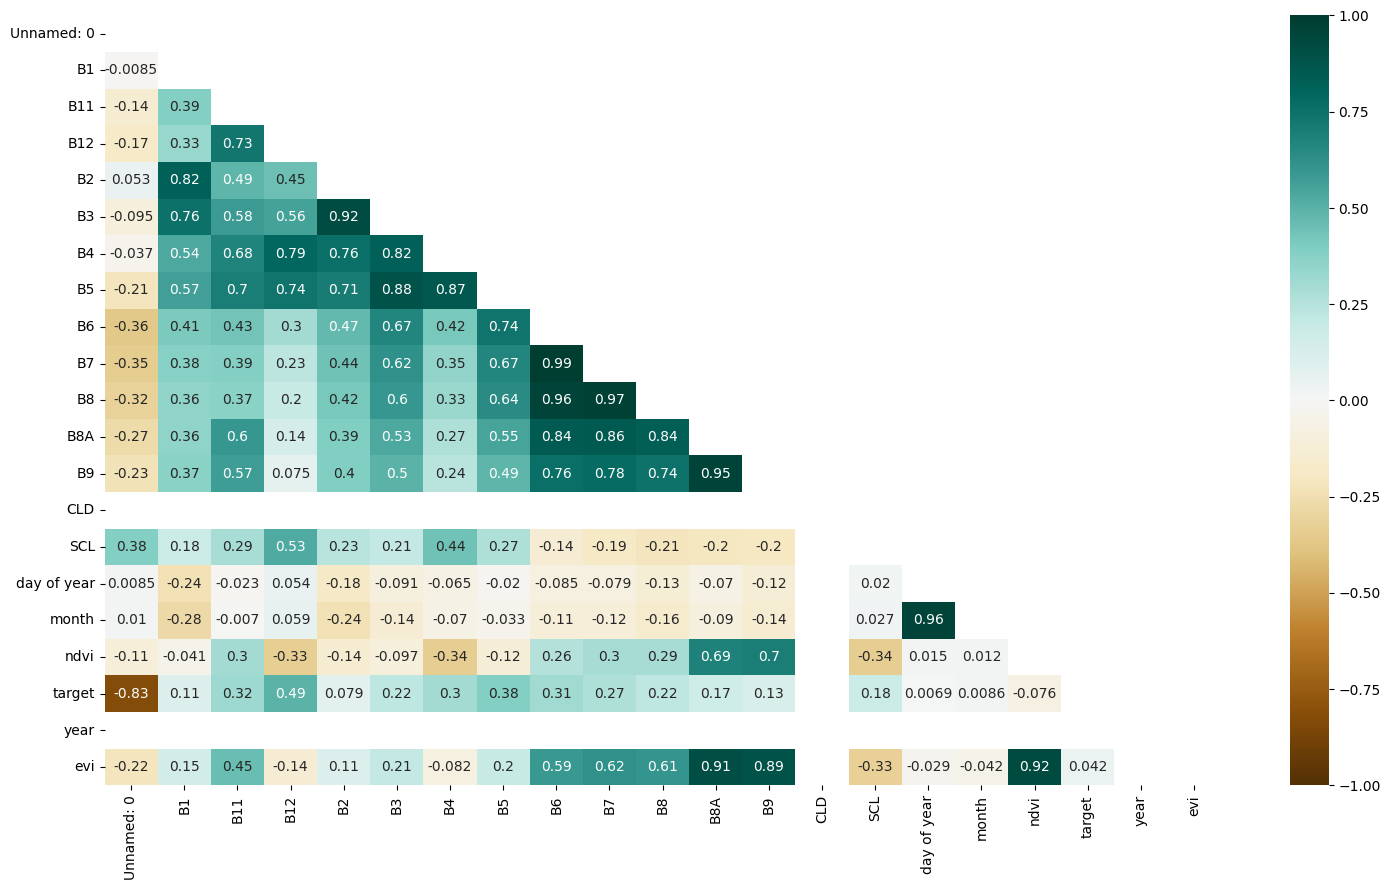

In [ ]:
plt.figure(figsize=(18, 10))
mask = np.triu(np.ones_like(trees_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(trees_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
# find the maximum of each column
maxValues = trees_df.max()
 
print(maxValues)

Unnamed: 0                      14360
B1                           0.297925
B11                           0.54475
B12                          0.446525
B2                             0.2338
B3                            0.28805
B4                            0.30335
B5                            0.36405
B6                           0.468525
B7                             0.5253
B8                             0.5453
B8A                           0.58205
B9                           0.574725
CLD                               0.0
SCL                              4.75
mtwara_cluster        Mtwara MC 02-13
datetime          2022-12-28 07:42:49
day of year                     362.0
month                            12.0
ndvi                         0.531482
target                            1.0
year                           2022.0
evi                          0.740909
dtype: object


In [ ]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(trees_df, .9)

B8A          evi           0.908404
B2           B3            0.917450
ndvi         evi           0.923871
B8A          B9            0.953479
day of year  month         0.956789
B6           B8            0.959191
B7           B8            0.969032
B6           B7            0.989165
Unnamed: 0   Unnamed: 0         NaN
dtype: float64

In [ ]:
# looking for date with most value counts

In [ ]:
trees_df['datetime'].value_counts()

2022-11-28 07:42:46    167
2022-10-04 07:42:54    154
2022-12-28 07:42:46    154
2022-11-13 07:42:50    144
2022-10-19 07:42:46    140
2022-12-03 07:42:47    134
2022-11-08 07:42:46    122
2022-12-18 07:42:46    119
2022-11-18 07:42:47     89
2022-09-04 07:42:59     87
2022-09-29 07:42:47     80
2022-10-29 07:42:46     73
2022-10-14 07:42:51     71
2022-10-24 07:42:49     61
2022-12-08 07:42:43     60
2022-11-23 07:42:47     53
2022-11-03 07:42:51     45
2022-09-14 07:42:57     42
2022-10-09 07:42:45     41
2022-11-13 07:42:53     36
2022-09-19 07:42:48     33
2022-12-13 07:42:47     30
2022-09-24 07:42:54     22
2022-09-29 07:42:50     19
2022-12-03 07:42:50     18
2022-09-04 07:43:02     18
2022-10-04 07:42:57     15
2022-11-18 07:42:50     11
2022-10-19 07:42:49      9
2022-11-28 07:42:49      7
2022-11-23 07:42:50      3
2022-12-18 07:42:49      2
2022-09-19 07:42:52      2
2022-12-28 07:42:49      1
2022-09-14 07:43:00      1
2022-10-09 07:42:48      1
Name: datetime, dtype: int64

In [ ]:
trees_df.isna().sum()

Unnamed: 0        0
B1                0
B11               0
B12               0
B2                0
B3                0
B4                0
B5                0
B6                0
B7                0
B8                0
B8A               0
B9                0
CLD               0
SCL               0
mtwara_cluster    0
datetime          0
day of year       0
month             0
ndvi              0
target            0
year              0
evi               0
dtype: int64

<AxesSubplot:>

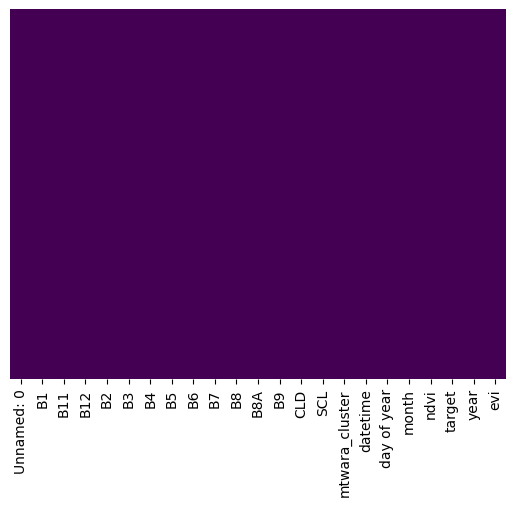

In [ ]:
sns.heatmap(trees_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [ ]:
from scipy.stats import skew

In [ ]:
sns.distplot(trees_df['target'])
plt.show()

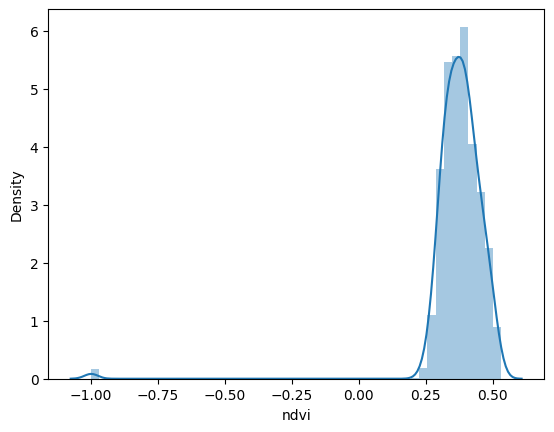

In [ ]:
sns.distplot(trees_df['ndvi'])
plt.show()

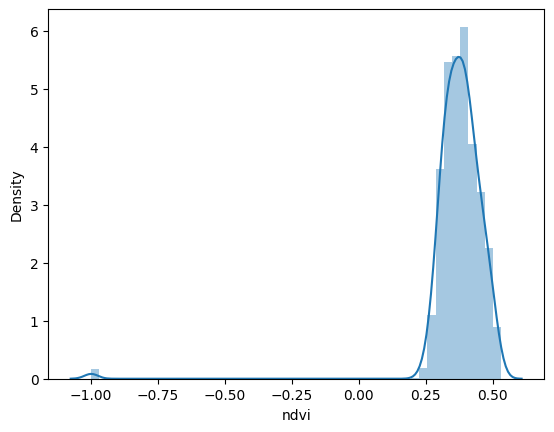

In [ ]:
sns.distplot(trees_df['ndvi'])
plt.show()

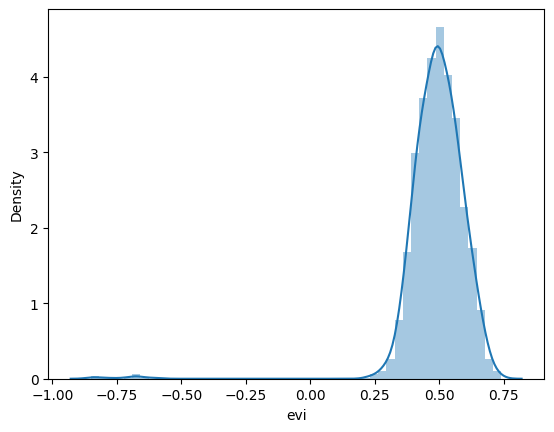

In [ ]:
sns.distplot(trees_df['evi'])
plt.show()

Text(0, 0.5, 'target')

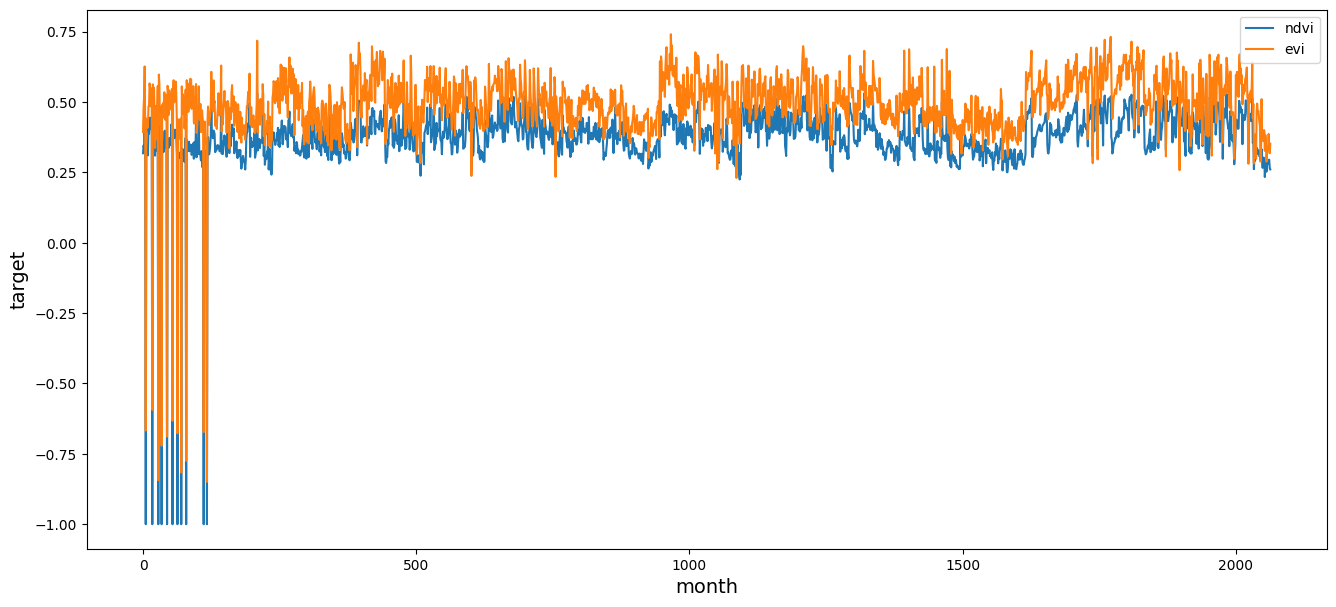

In [ ]:
fig, ax = plt.subplots(figsize = (16, 7))
# Add y-values 
ax.plot("ndvi", data = trees_df, label = "ndvi") 
ax.plot("evi", data = trees_df, label = "evi") 
#ax.plot("month", data = trees_df, label = "month") 
# Add y-values 
#ax.plot("dbh", data = df, label = "dbh")
# Add legend
ax.legend()
#ax.set(title=' Biomass of Mango, Cashew and Palm trees by circumference at Breast Height')
# Add axis labels
ax.set_xlabel("month", size = 14)
ax.set_ylabel("target", size = 14)


[Text(0.5, 1.0, 'NDVI sequence of Cashew and non Cashew for Mtwara Region in 2022')]

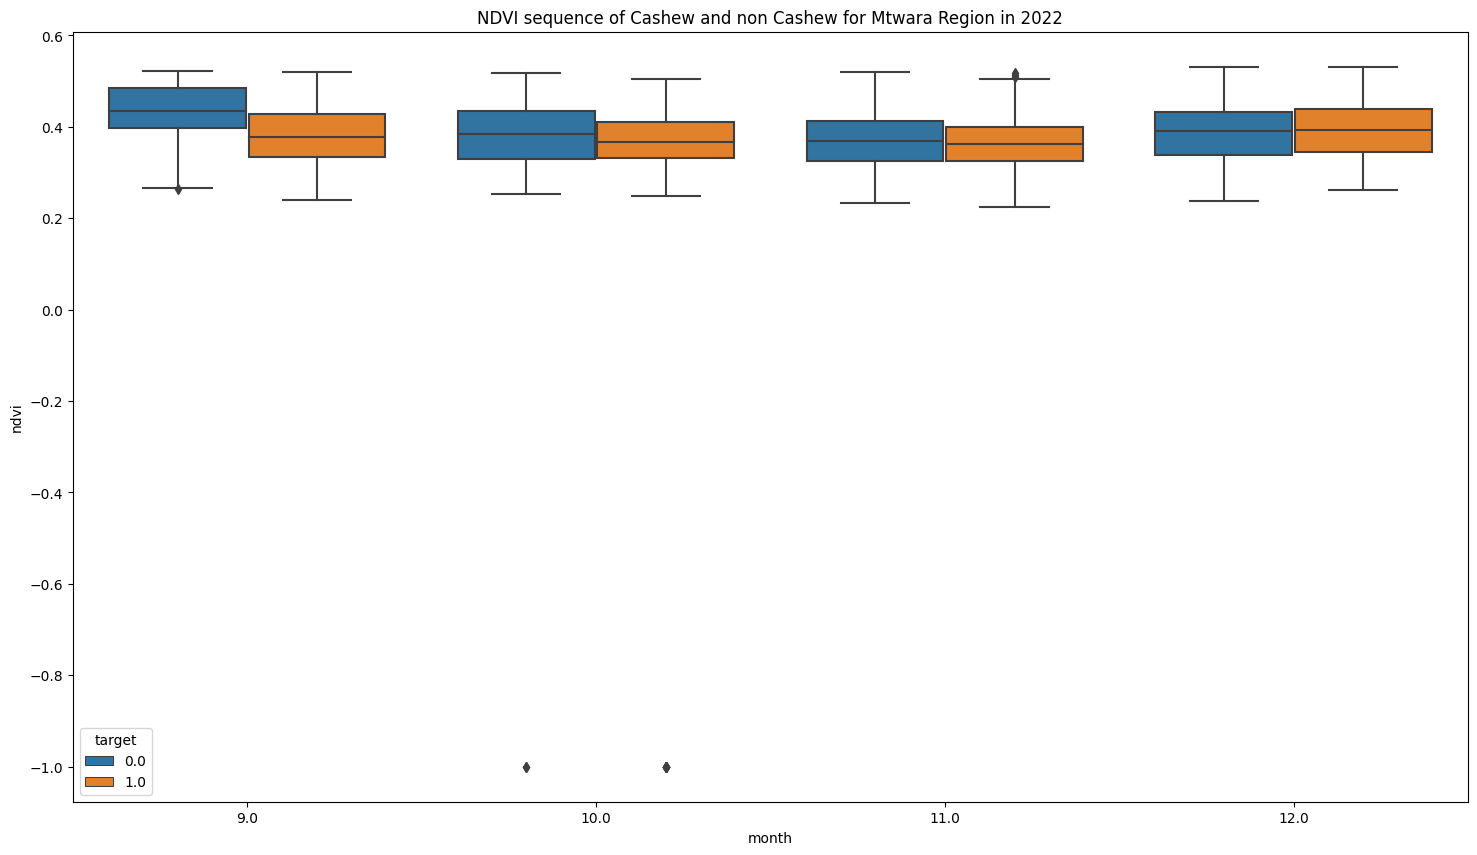

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="ndvi", hue="target").set(title='NDVI sequence of Cashew and non Cashew for Mtwara Region in 2022')

[Text(0.5, 1.0, 'EVI sequence of Cashew and non Cashew for Mtwara Region in 2022')]

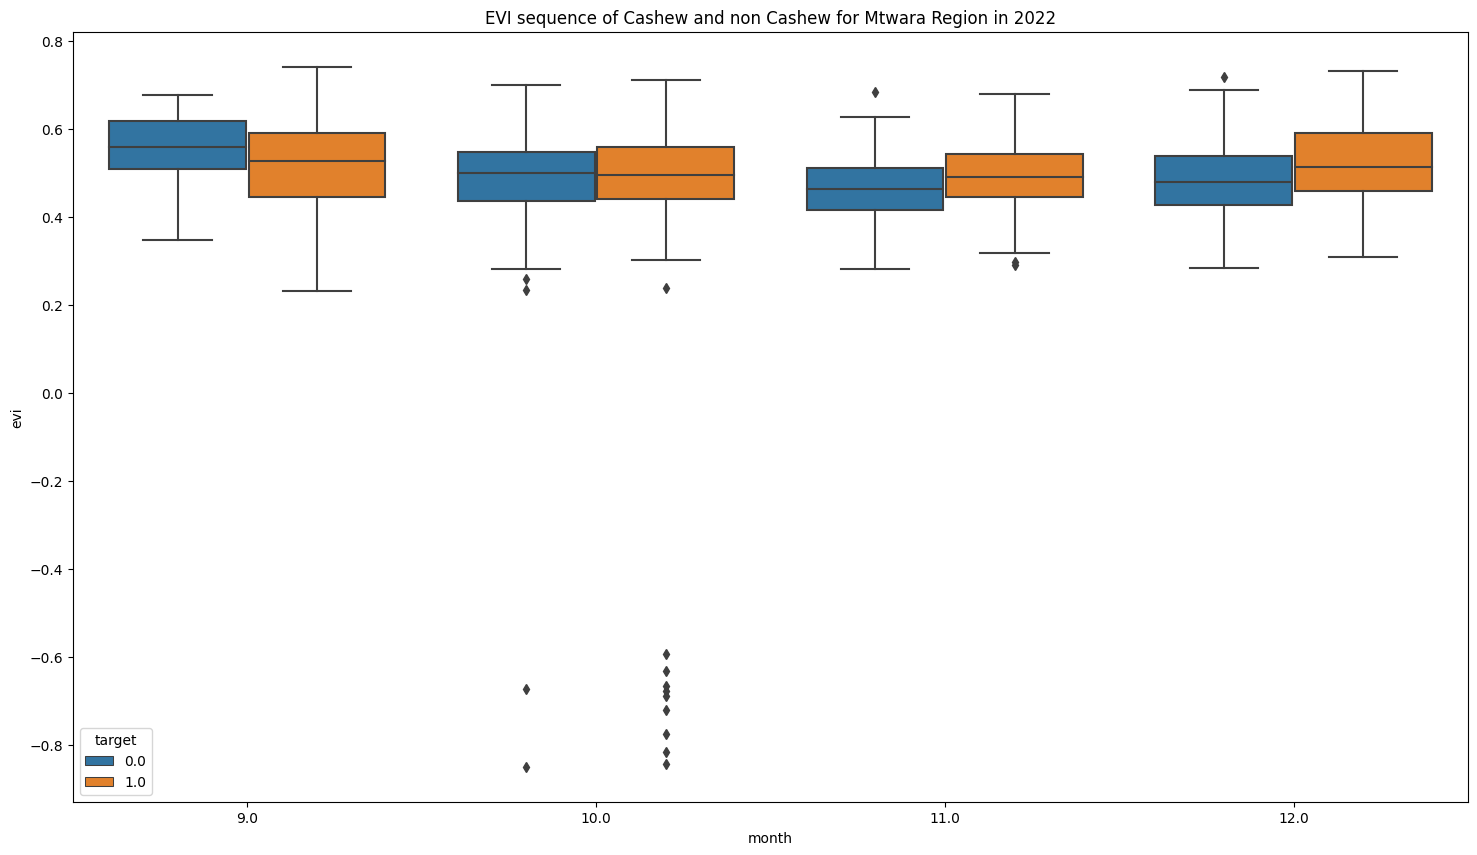

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="evi", hue="target").set(title='EVI sequence of Cashew and non Cashew for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B4 for Mtwara Region in 2022')]

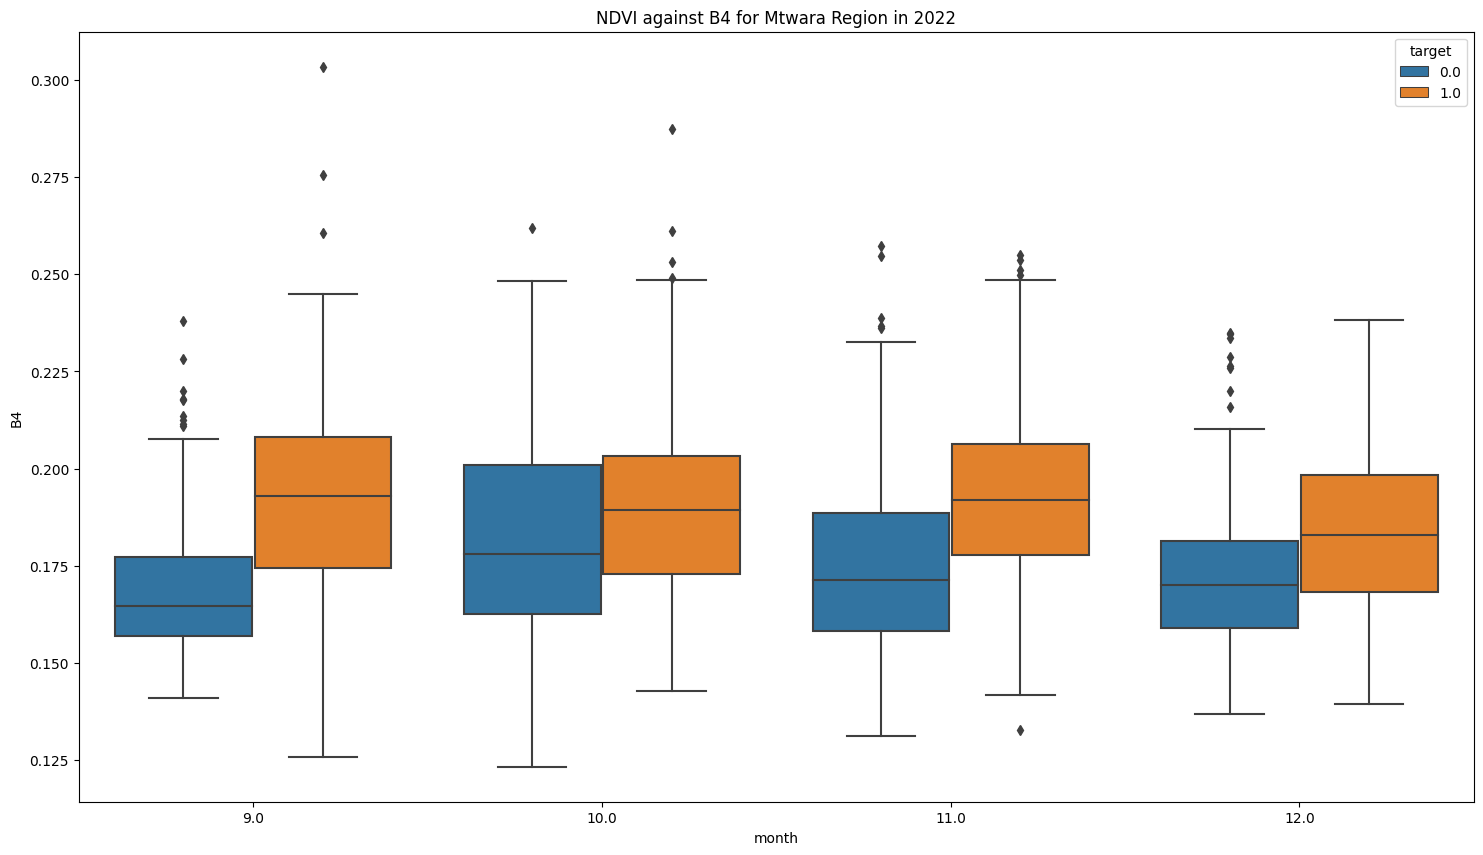

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B4", hue="target").set(title='NDVI against B4 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B5 for Mtwara Region in 2022')]

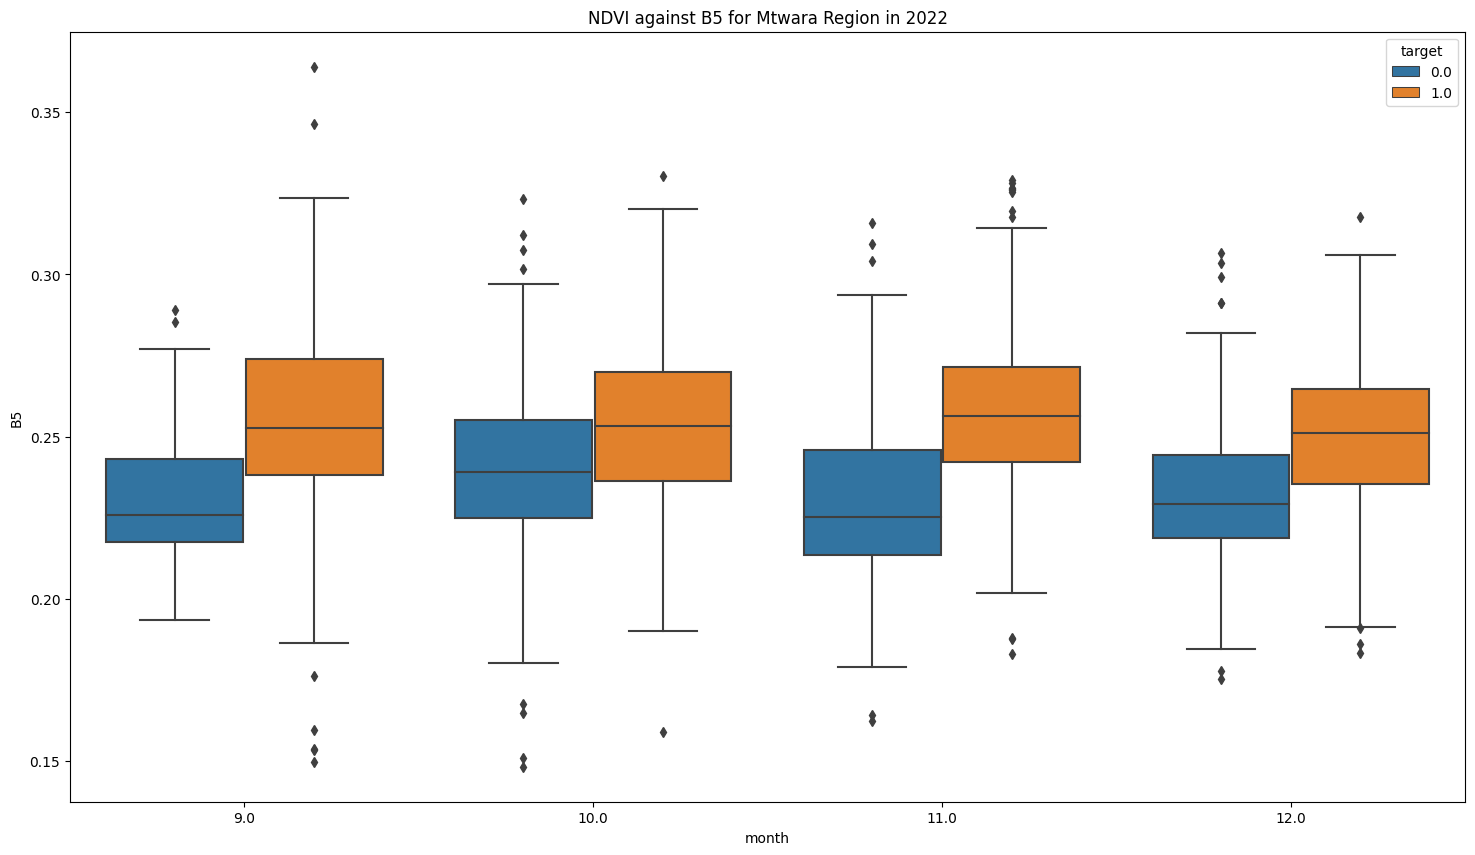

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B5", hue="target").set(title='NDVI against B5 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B6 for Mtwara Region in 2022')]

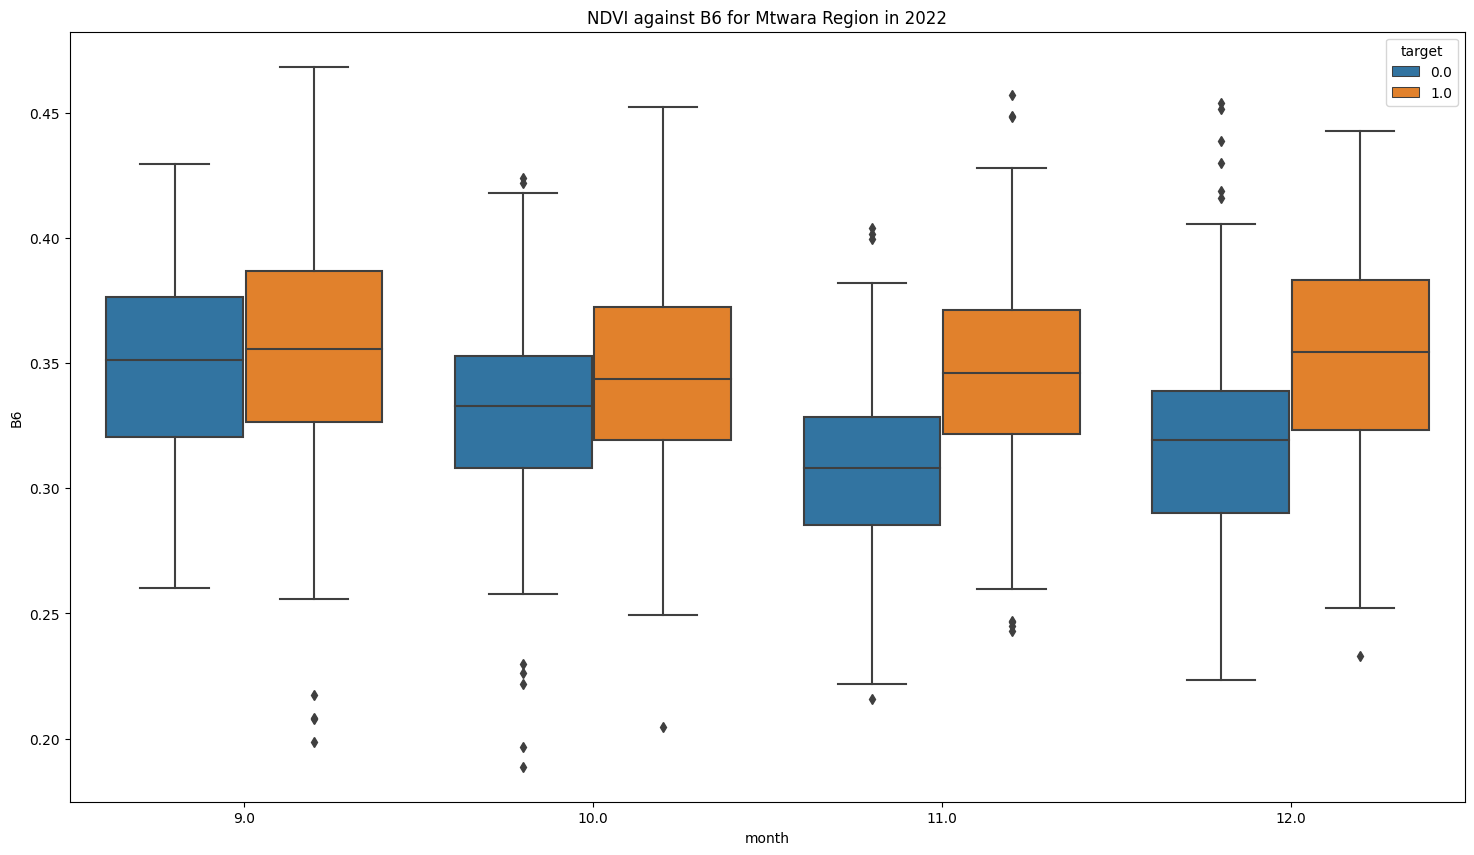

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B6", hue="target").set(title='NDVI against B6 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B7 for Mtwara Region in 2022')]

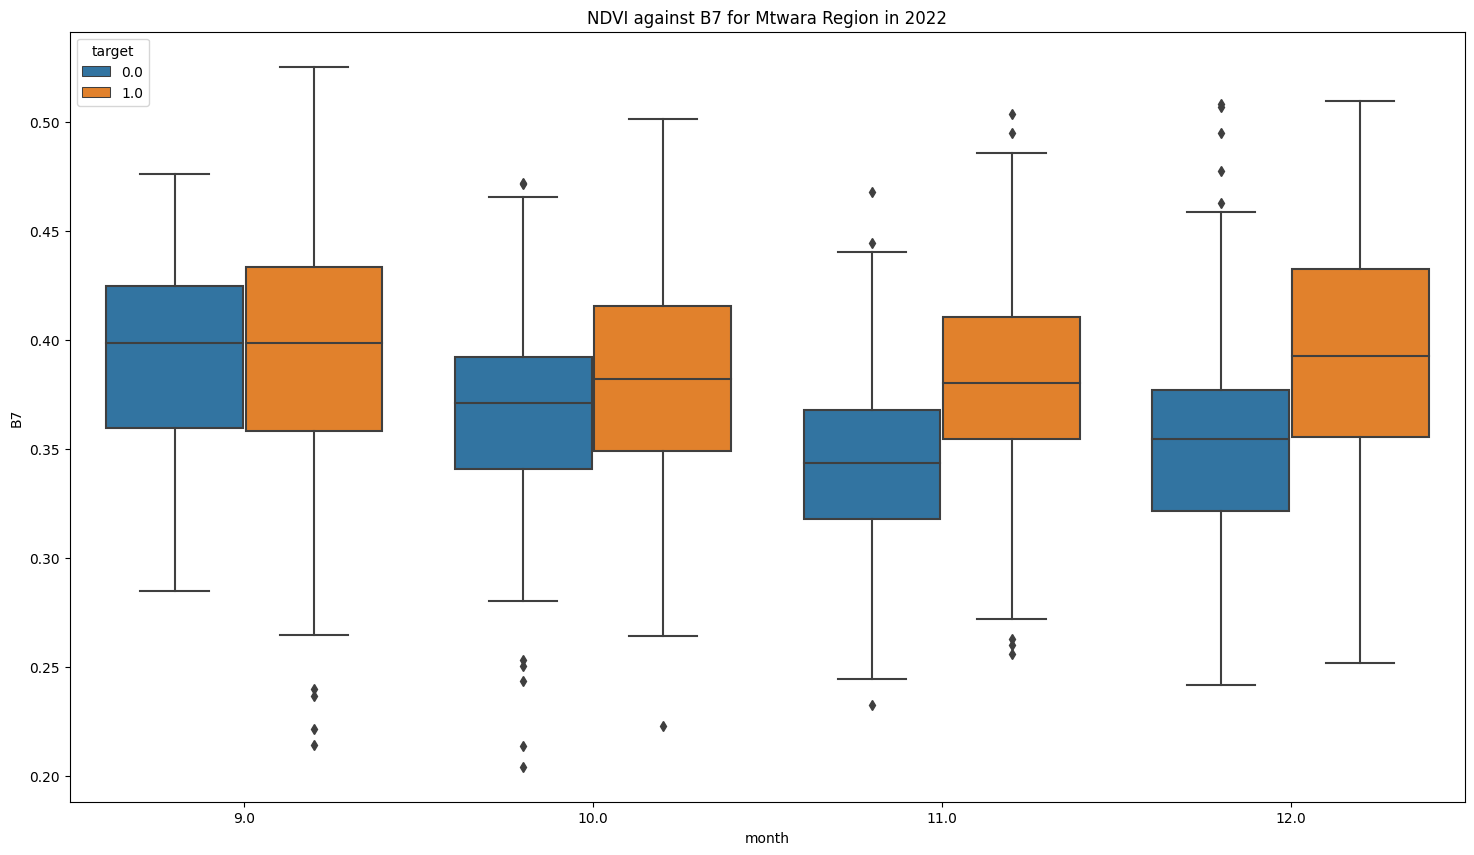

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B7", hue="target").set(title='NDVI against B7 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B8 for Mtwara Region in 2022')]

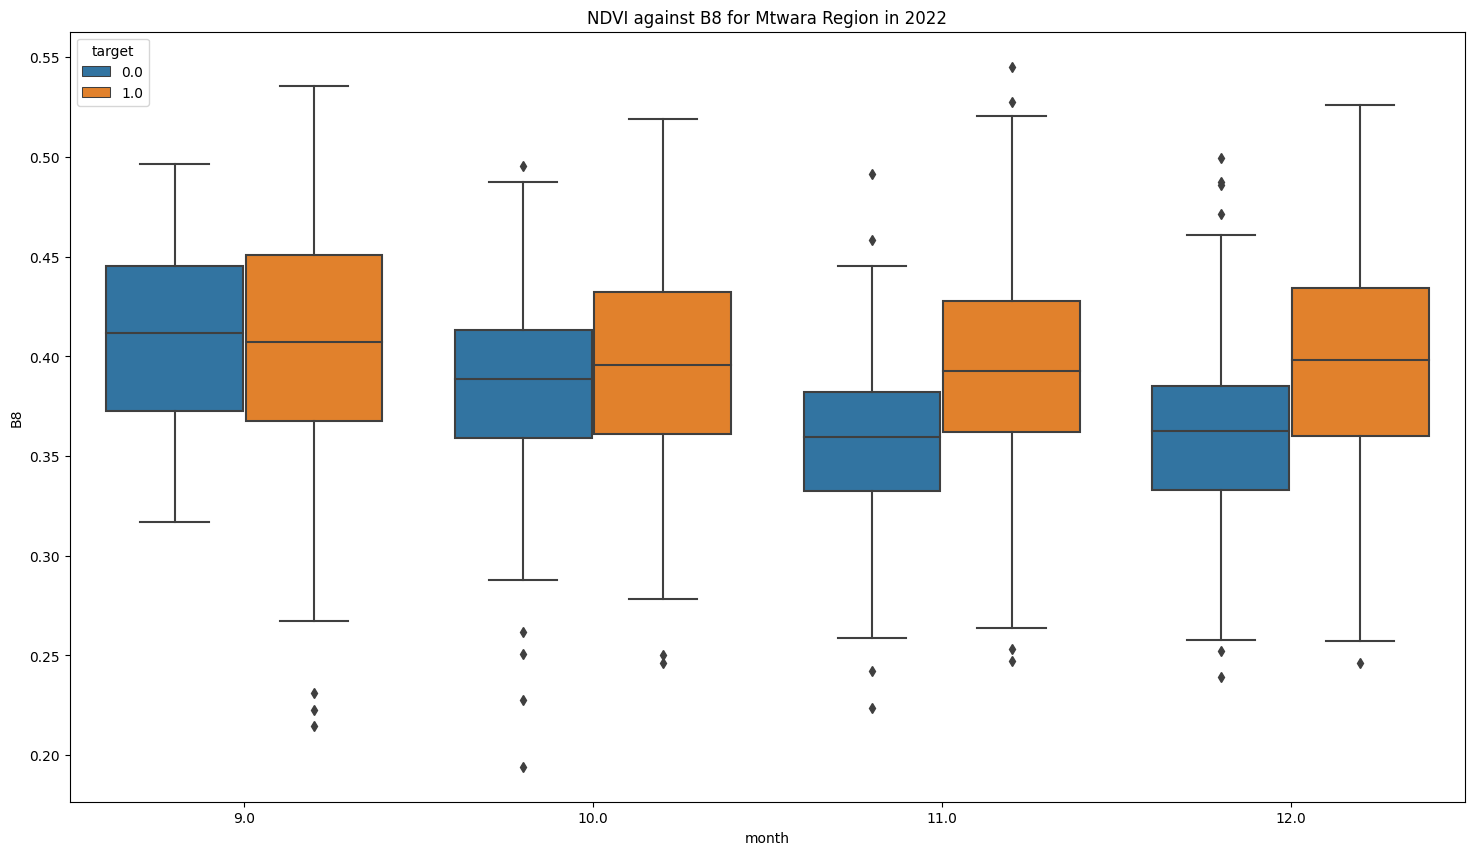

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B8", hue="target").set(title='NDVI against B8 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B8A for Mtwara Region in 2022')]

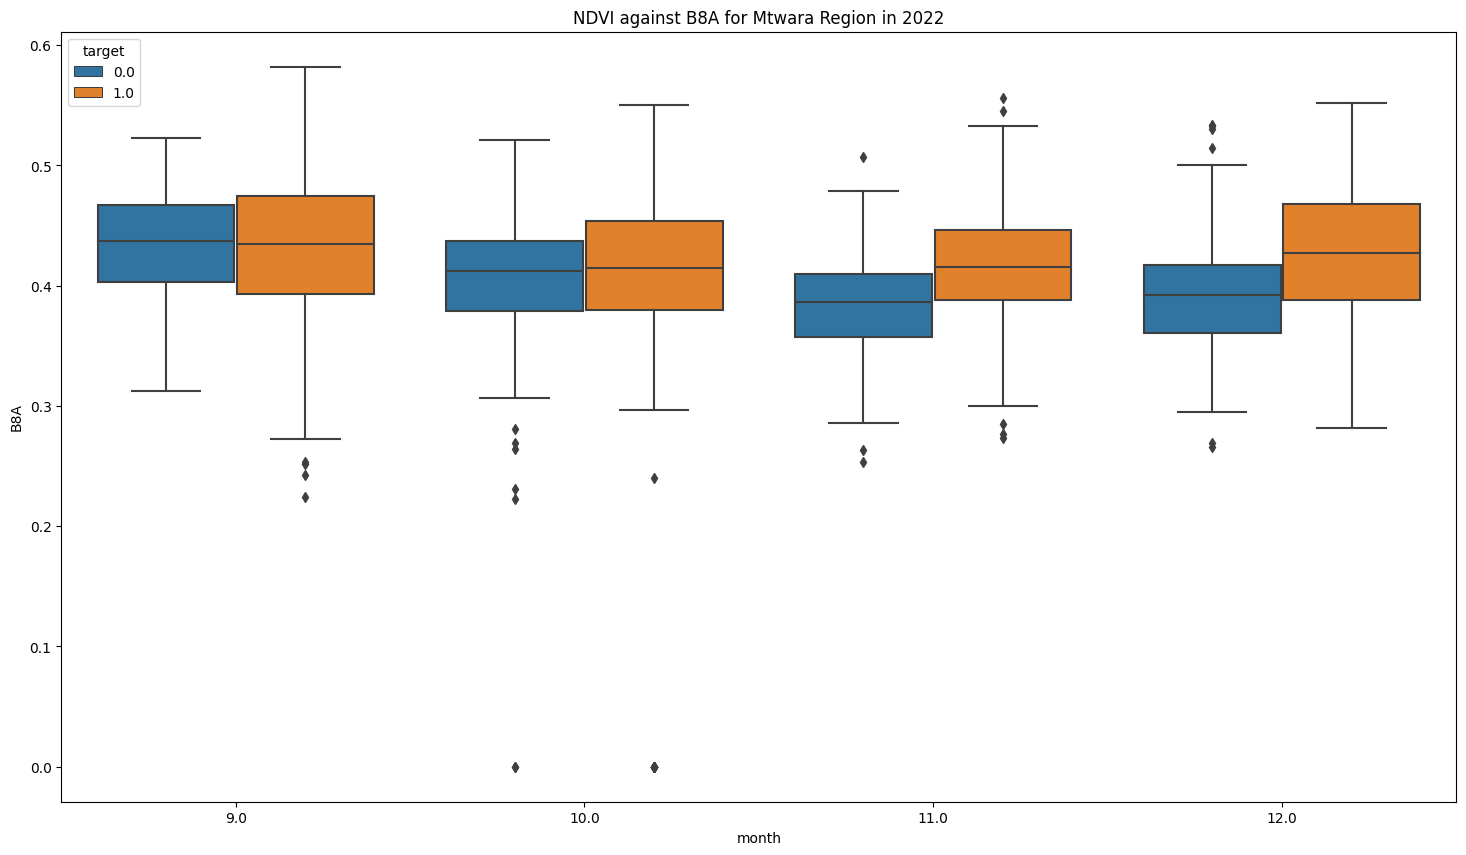

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B8A", hue="target").set(title='NDVI against B8A for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B9 for Mtwara Region in 2022')]

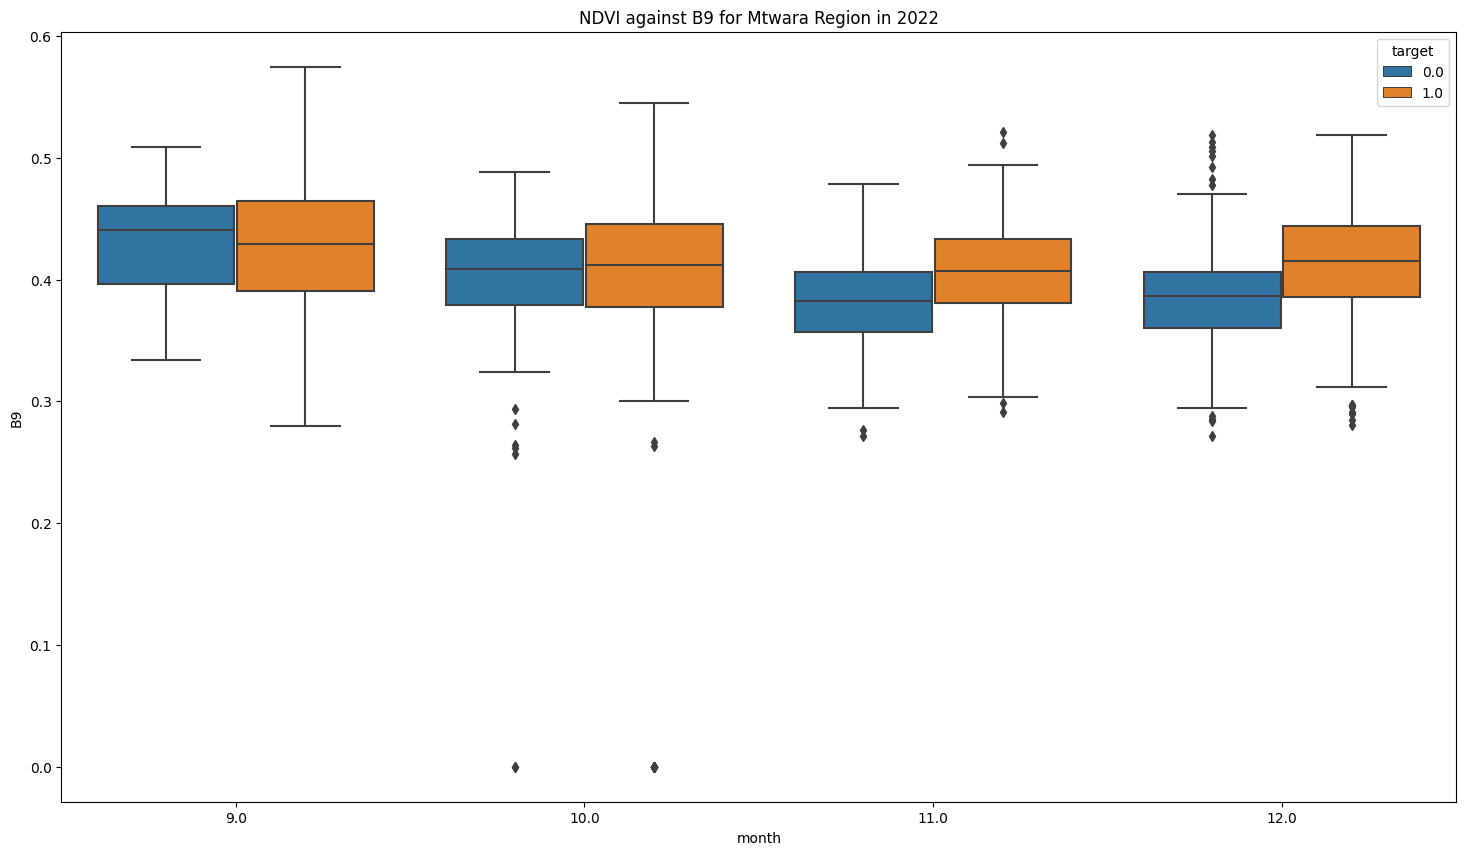

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B9", hue="target").set(title='NDVI against B9 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B11 for Mtwara Region in 2022')]

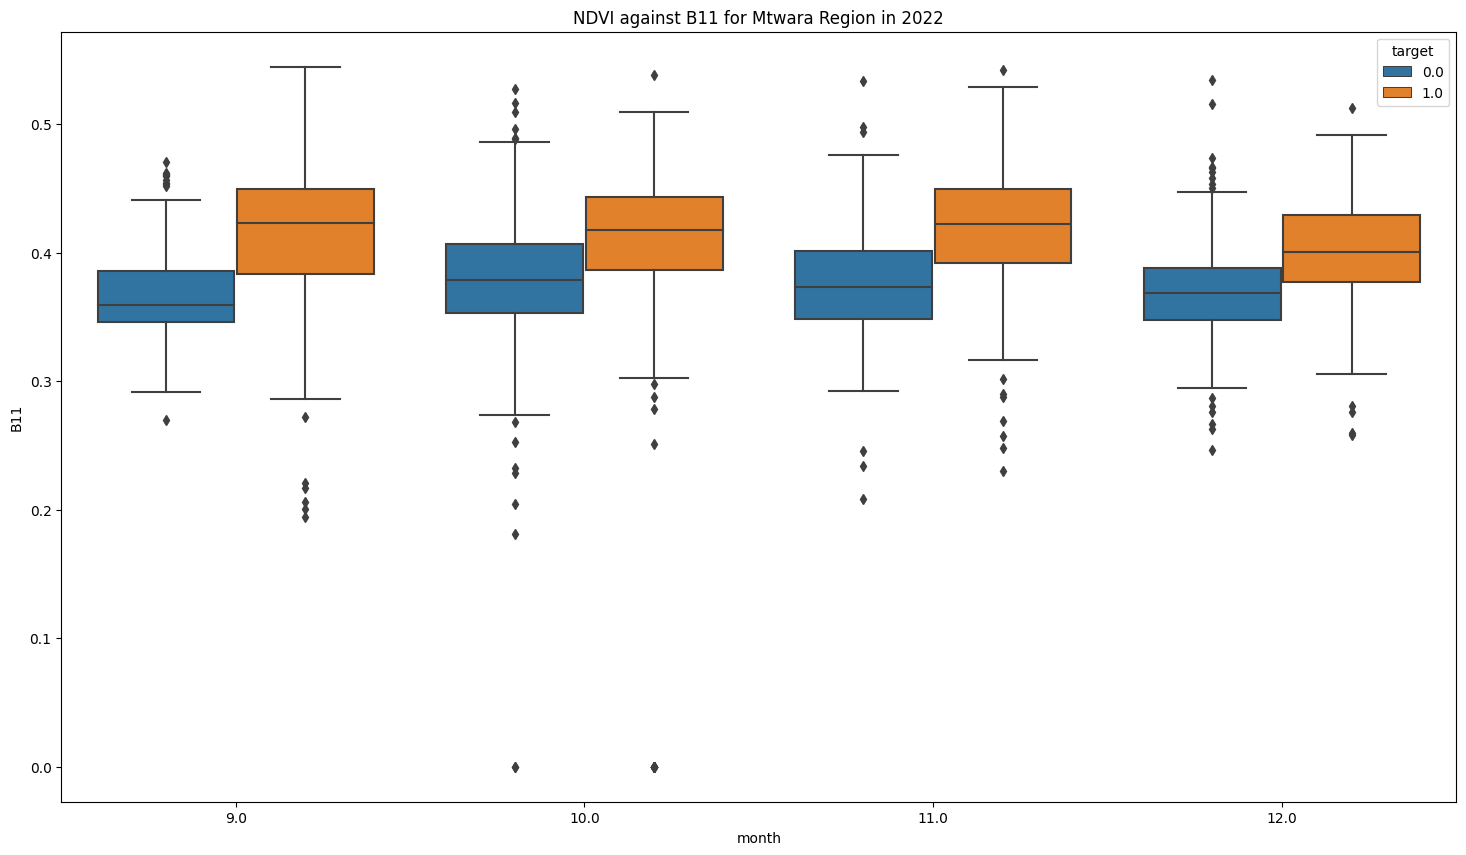

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B11", hue="target").set(title='NDVI against B11 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI against B12 for Mtwara Region in 2022')]

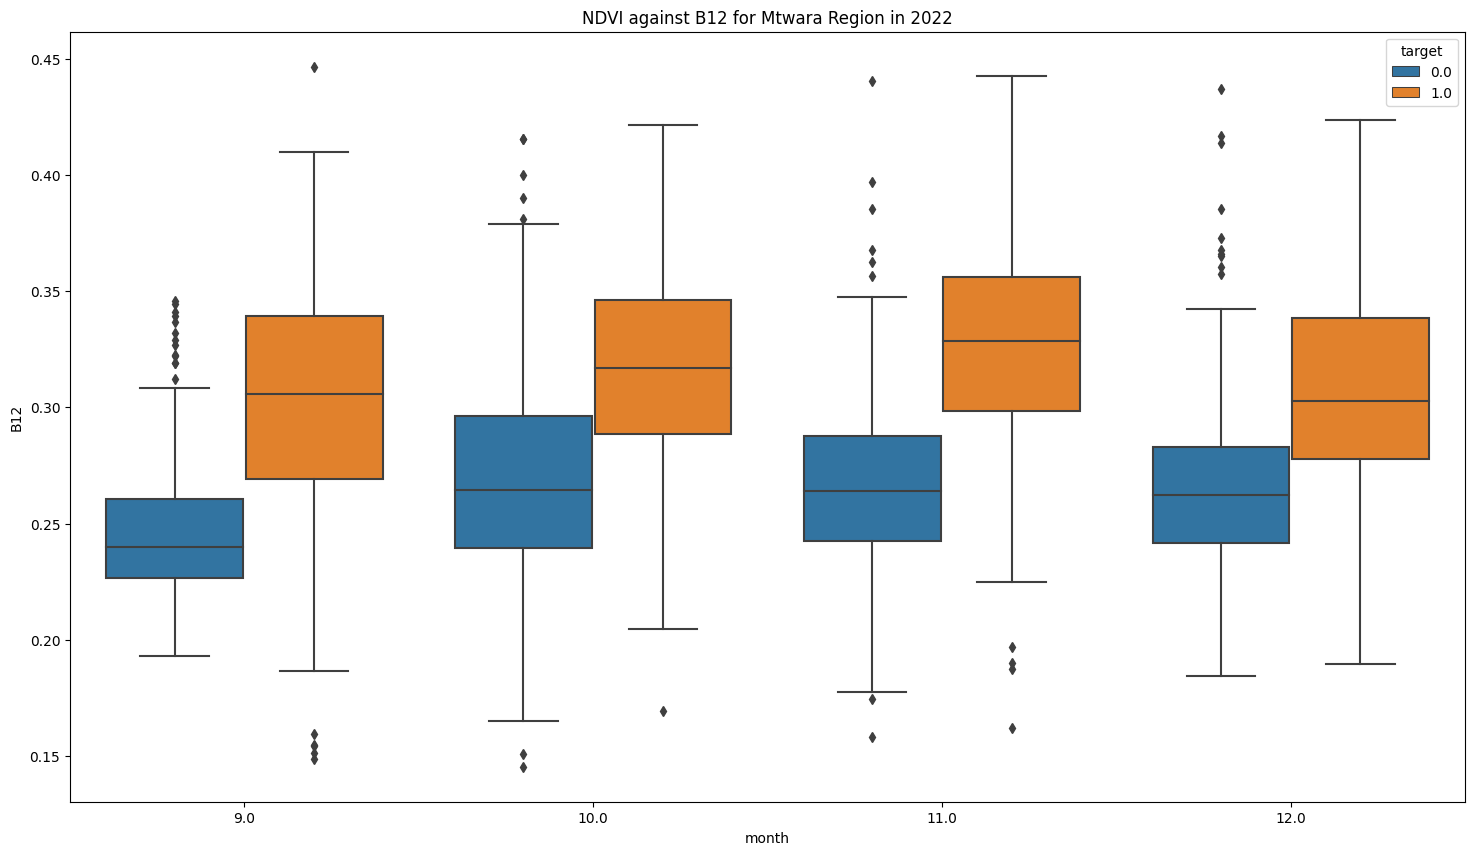

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B12", hue="target").set(title='NDVI against B12 for Mtwara Region in 2022')

In [ ]:
# spectral bands against ndvi

In [ ]:
#df_1 =dataframe1[(dataframe1['cluster']=="Mtwara DC 01-11")]
          

In [ ]:
#df_1

In [ ]:
#df_1[(df_1['cluster']=="Mtwara DC 01-11")]
          


In [ ]:
#table1 = pd.pivot_table(data=df_1,index=['cluster'])
#table1

In [ ]:
# multiple indexes

#table2 = pd.pivot_table(df_1,index=['target','cluster'])
#table2

In [ ]:
#table2.reset_index()

In [ ]:
#fig, ax = plt.subplots(figsize=(24,10))
#sns.histplot(x ='cluster',hue='target' , data = table2 )

In [ ]:
#table1.plot(kind='bar')

In [ ]:
#table2.plot(kind='bar')

In [ ]:
#trees_df

In [ ]:
#df_2=trees_df

[Text(0.5, 1.0, 'NDVI against B4 for Mtwara Region in 2022')]

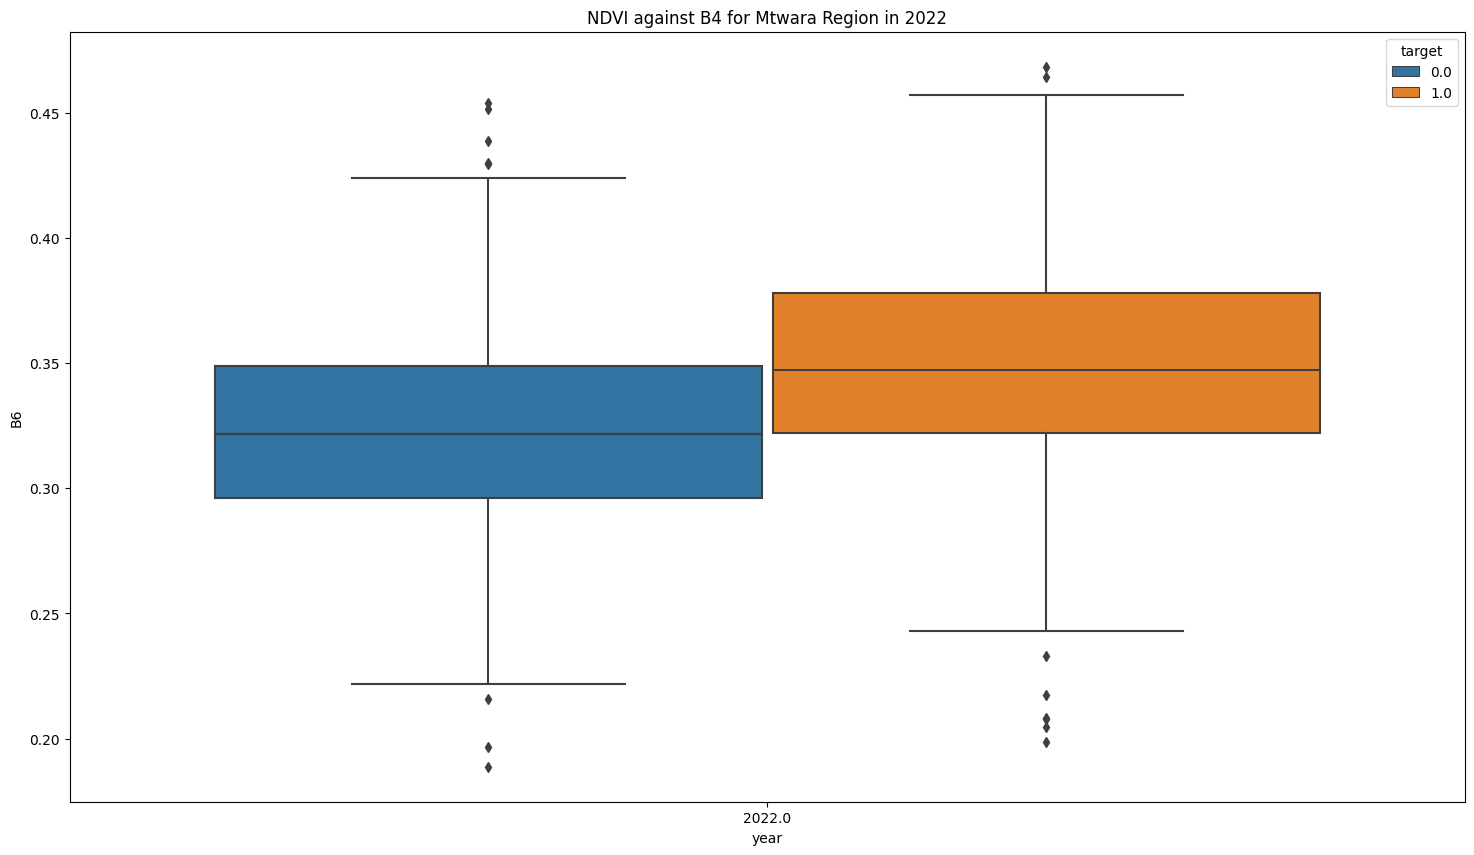

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="year", y="B6", hue="target").set(title='NDVI against B4 for Mtwara Region in 2022')

[Text(0.5, 1.0, 'NDVI for Mutwara Region Clusters in 2022')]

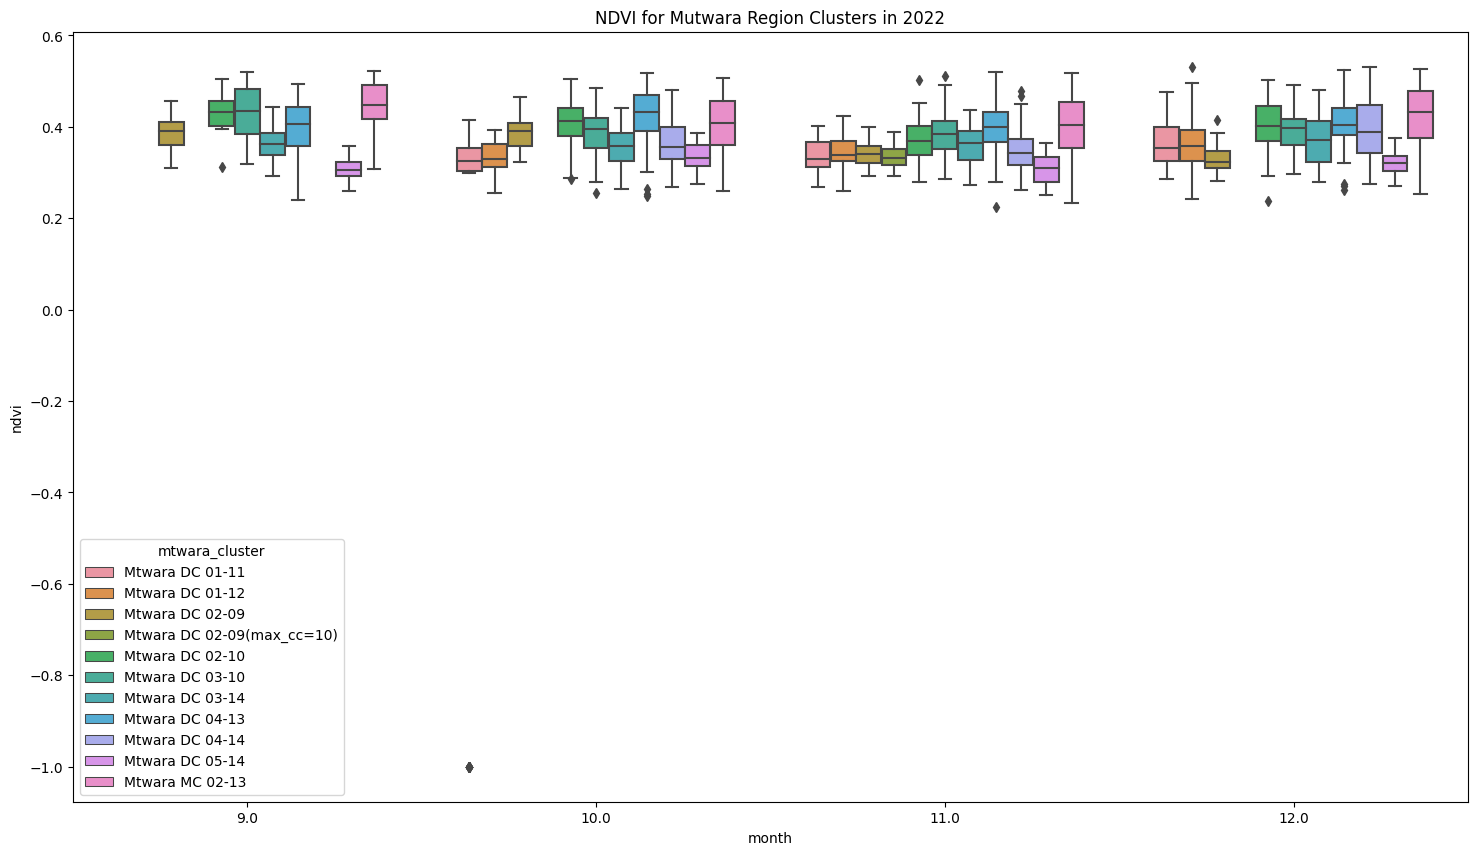

In [ ]:
# 
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="ndvi", hue="mtwara_cluster").set(title='NDVI for Mutwara Region Clusters in 2022')

[Text(0.5, 1.0, 'NDVI for Mtwara Region Clusters in 2022')]

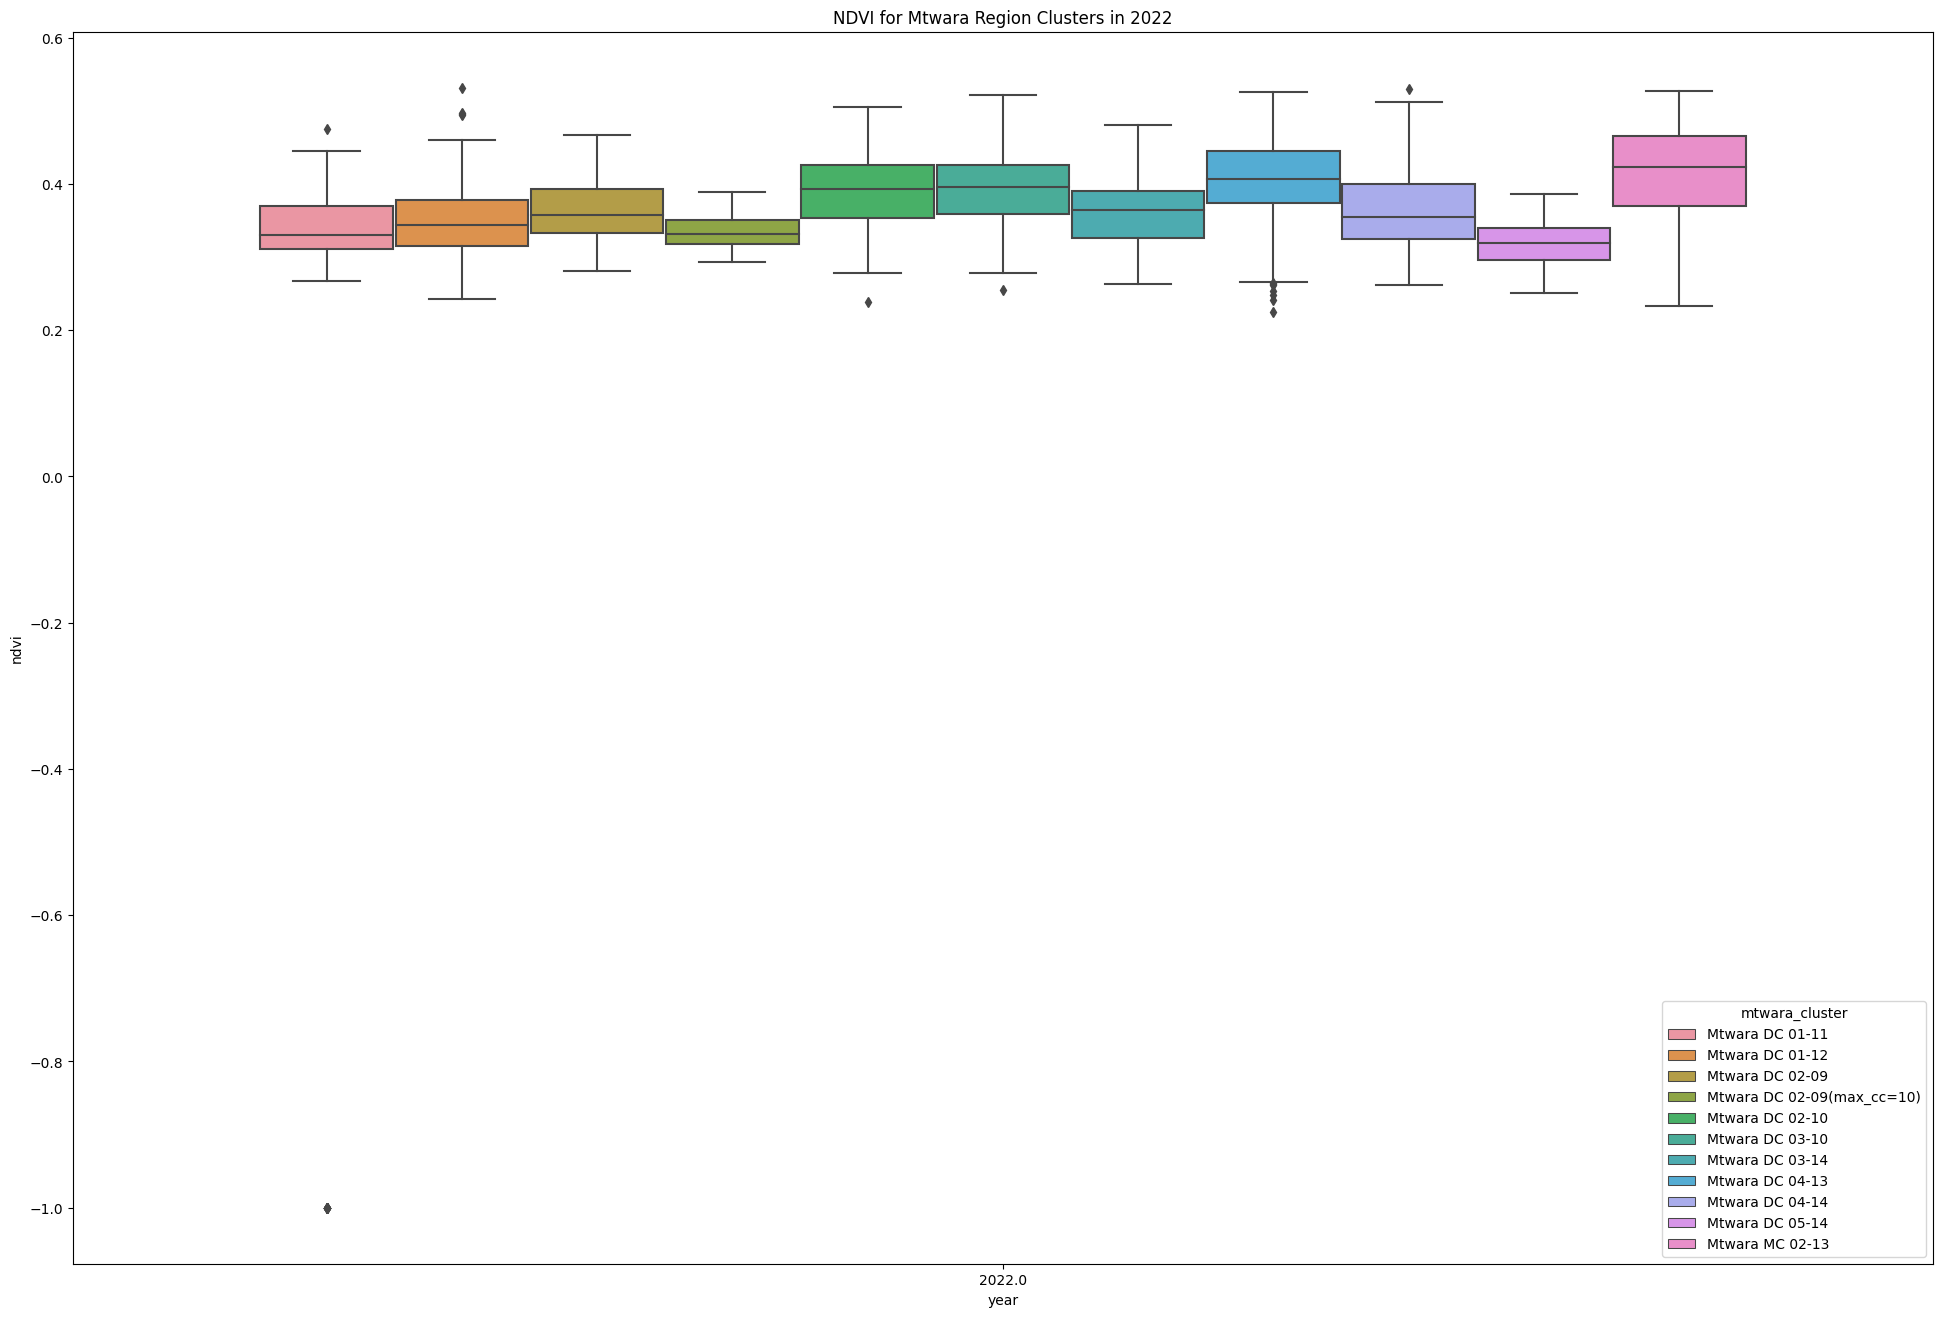

In [ ]:
# 
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="year", y="ndvi", hue="mtwara_cluster").set(title='NDVI for Mtwara Region Clusters in 2022')

[Text(0.5, 1.0, 'EVI for Mtwara Region Clusters in 2022')]

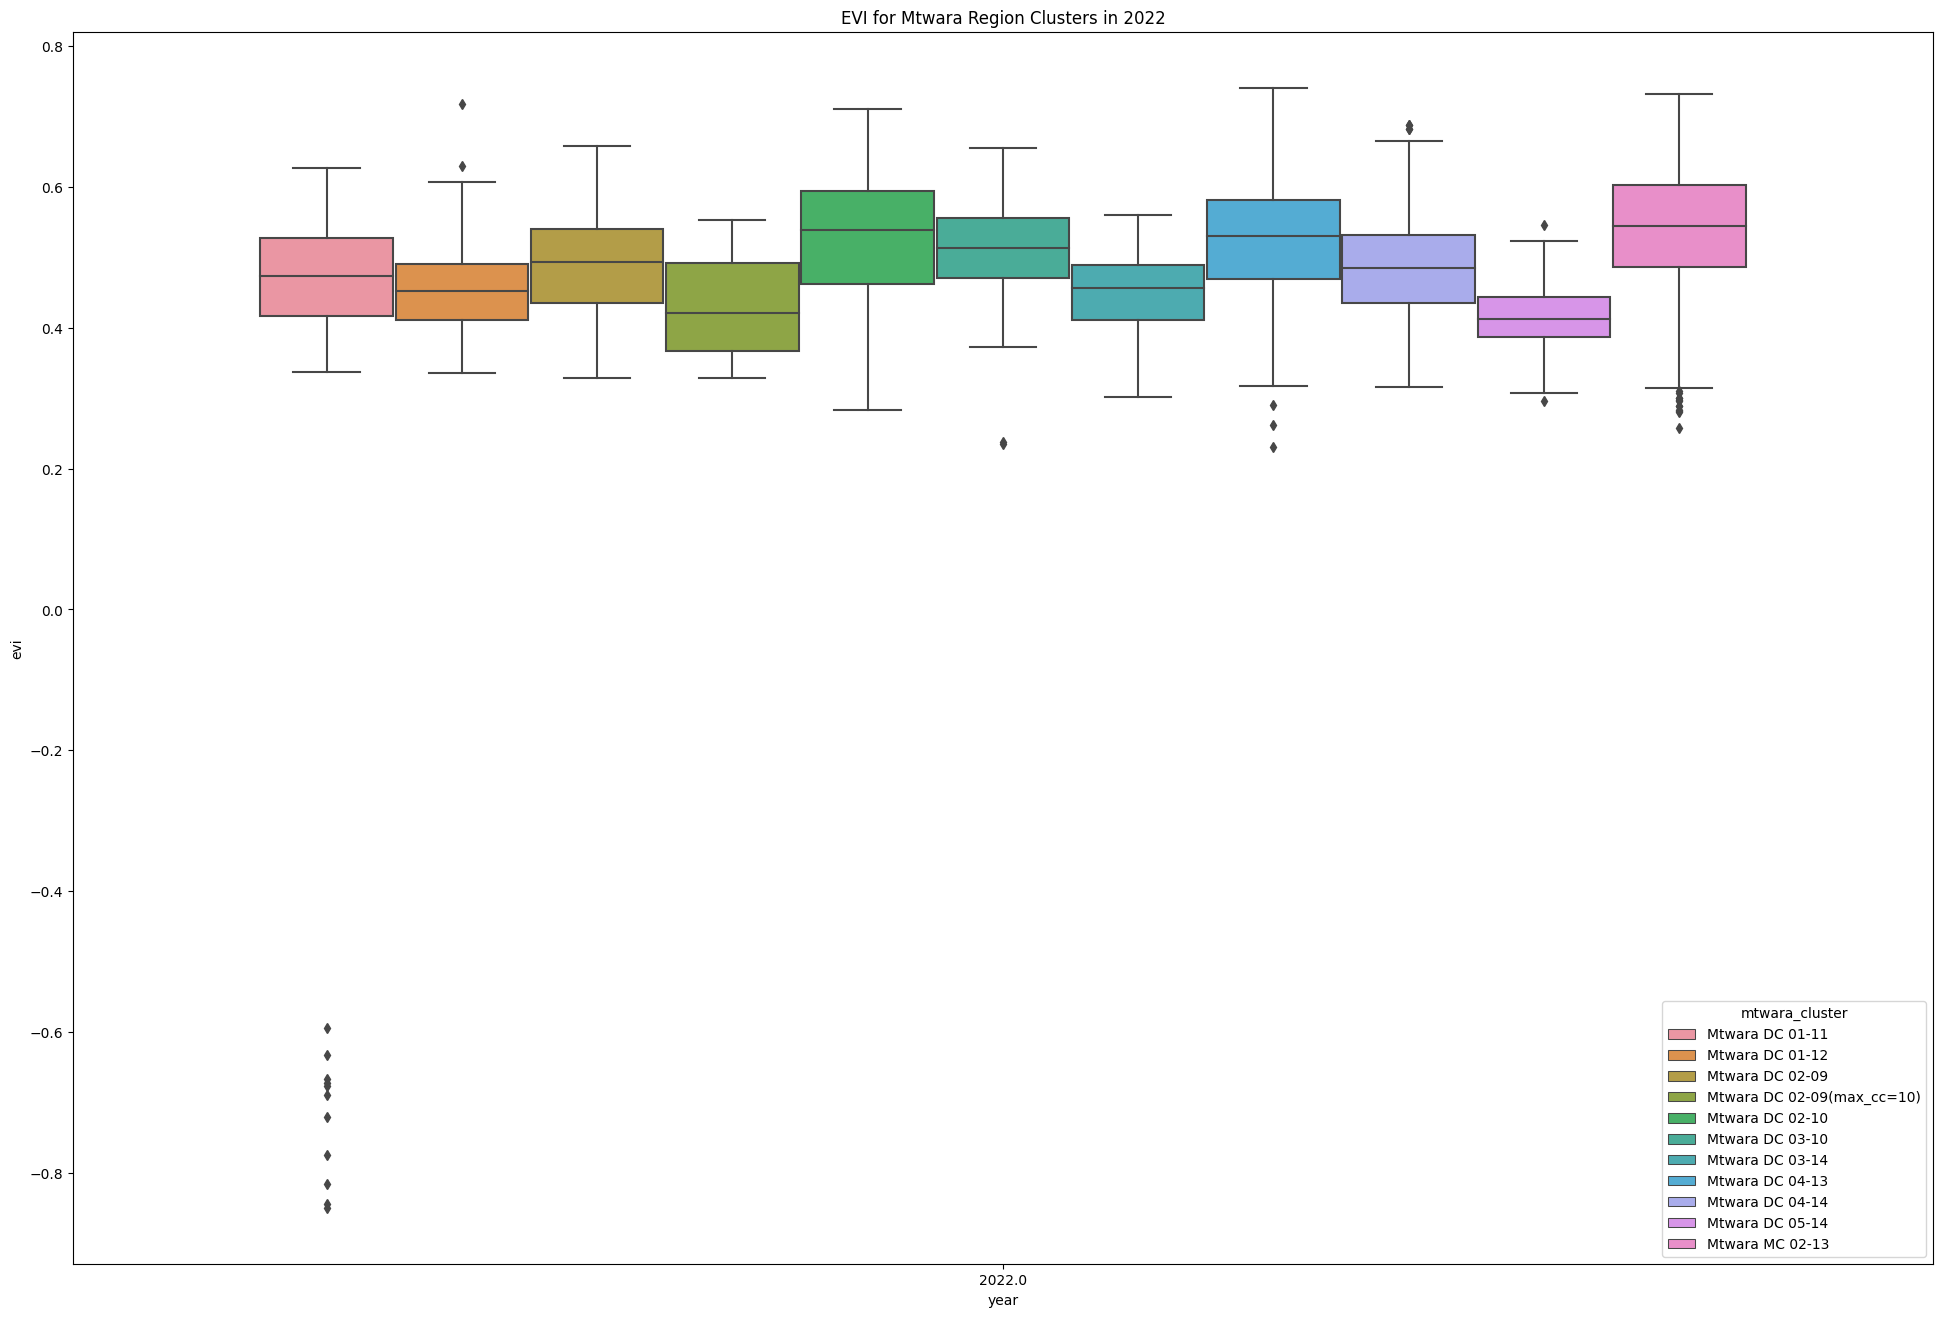

In [ ]:
# 
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="year", y="evi", hue="mtwara_cluster").set(title='EVI for Mtwara Region Clusters in 2022')

[Text(0.5, 1.0, 'NDVI for Mtwara Region Clusters in 2022')]

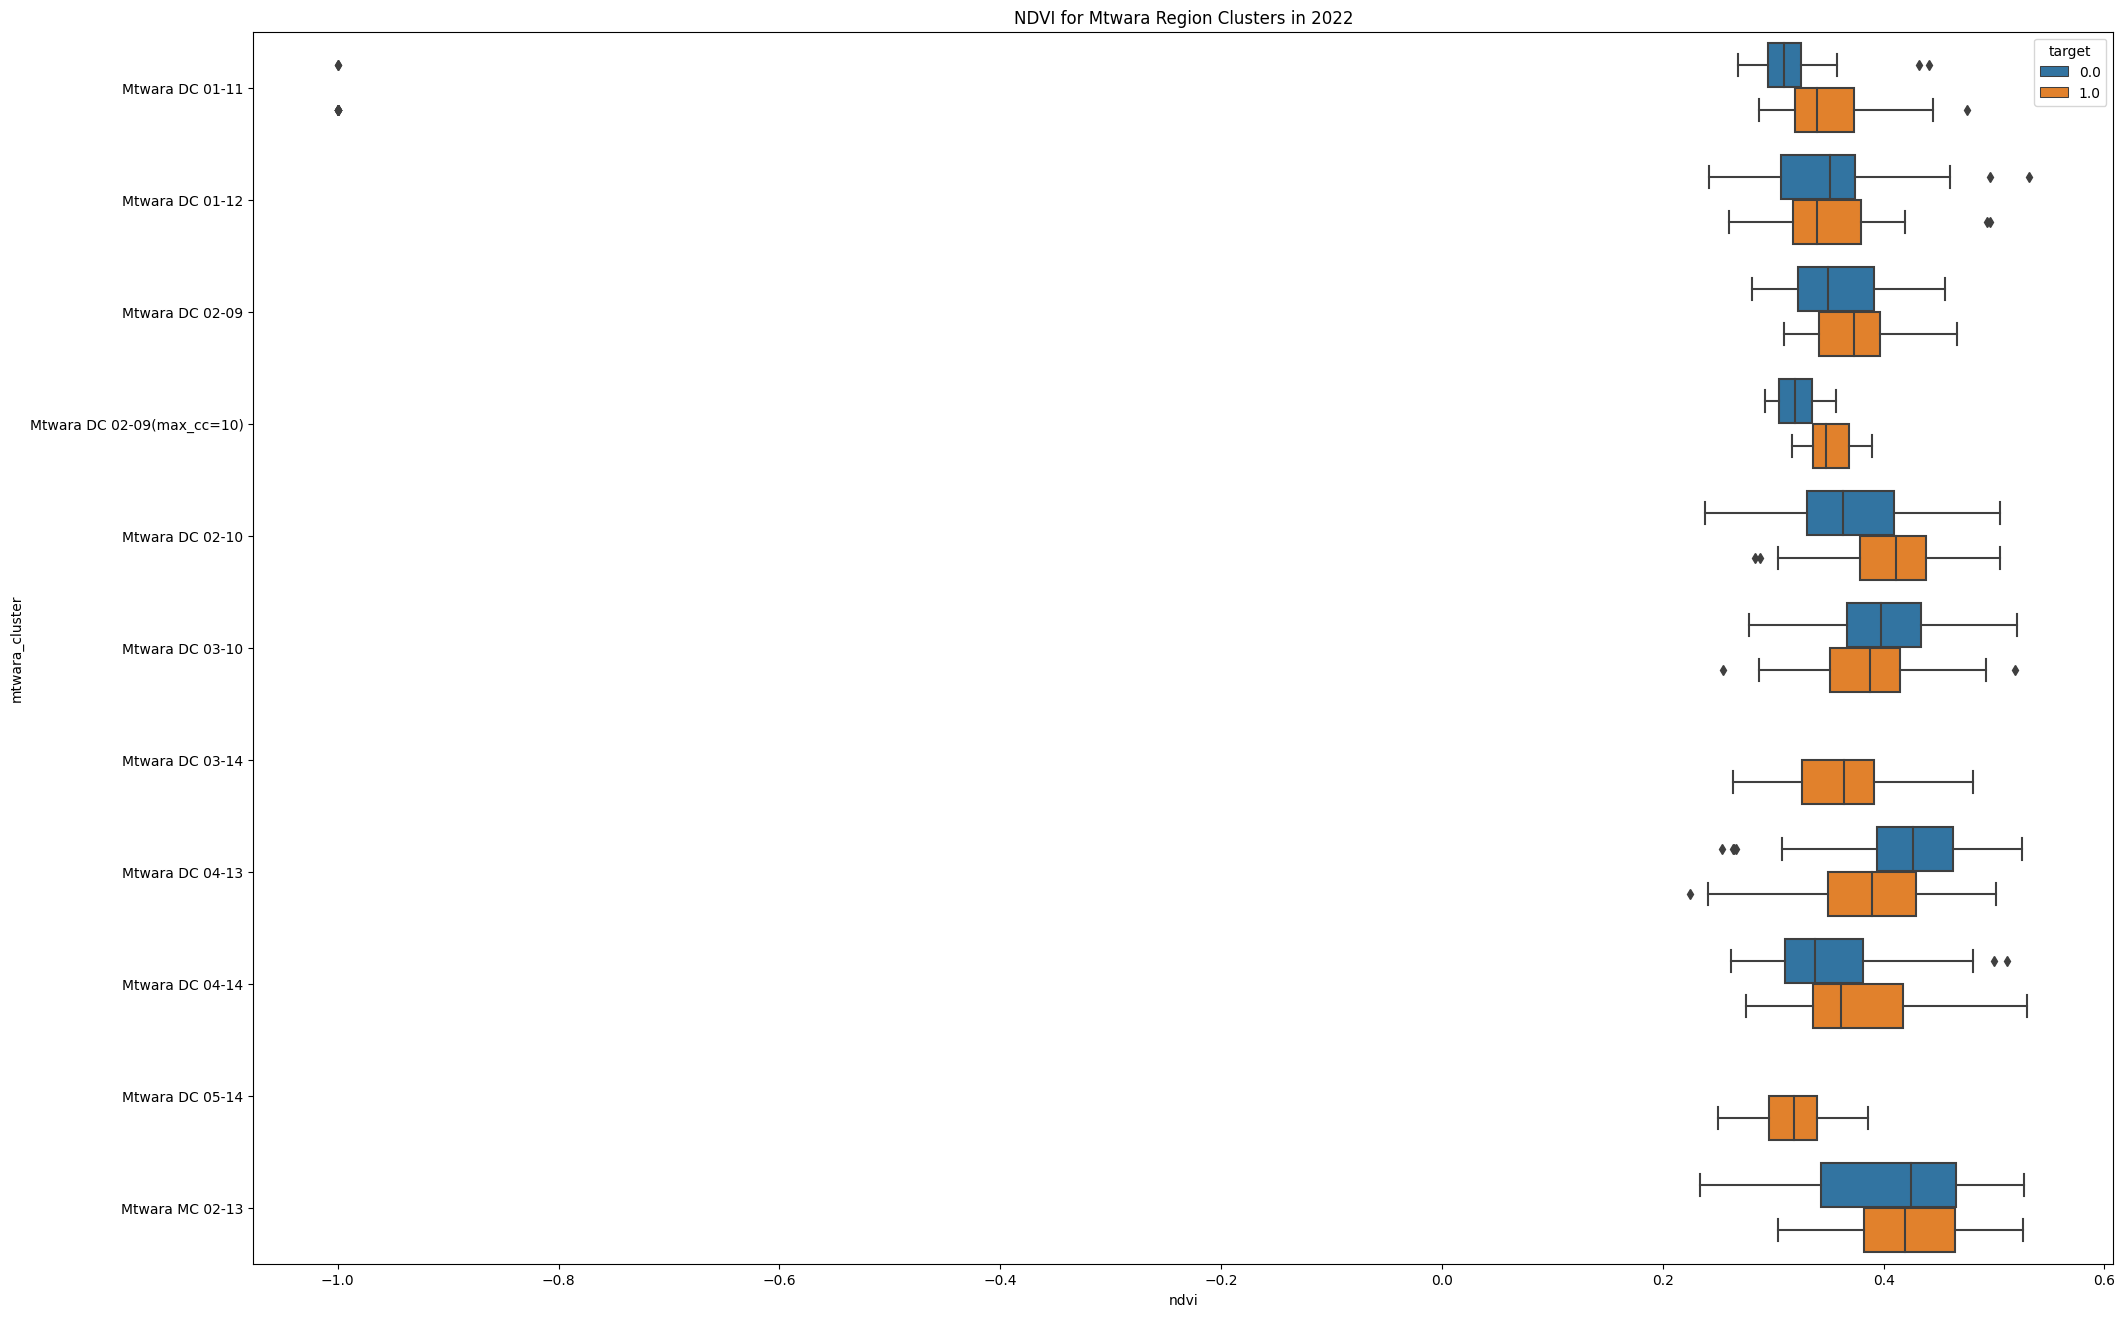

In [ ]:
# 
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="ndvi", y="mtwara_cluster", hue="target").set(title='NDVI for Mtwara Region Clusters in 2022')

[Text(0.5, 1.0, 'EVI for Mtwara Region by cluster in 2022')]

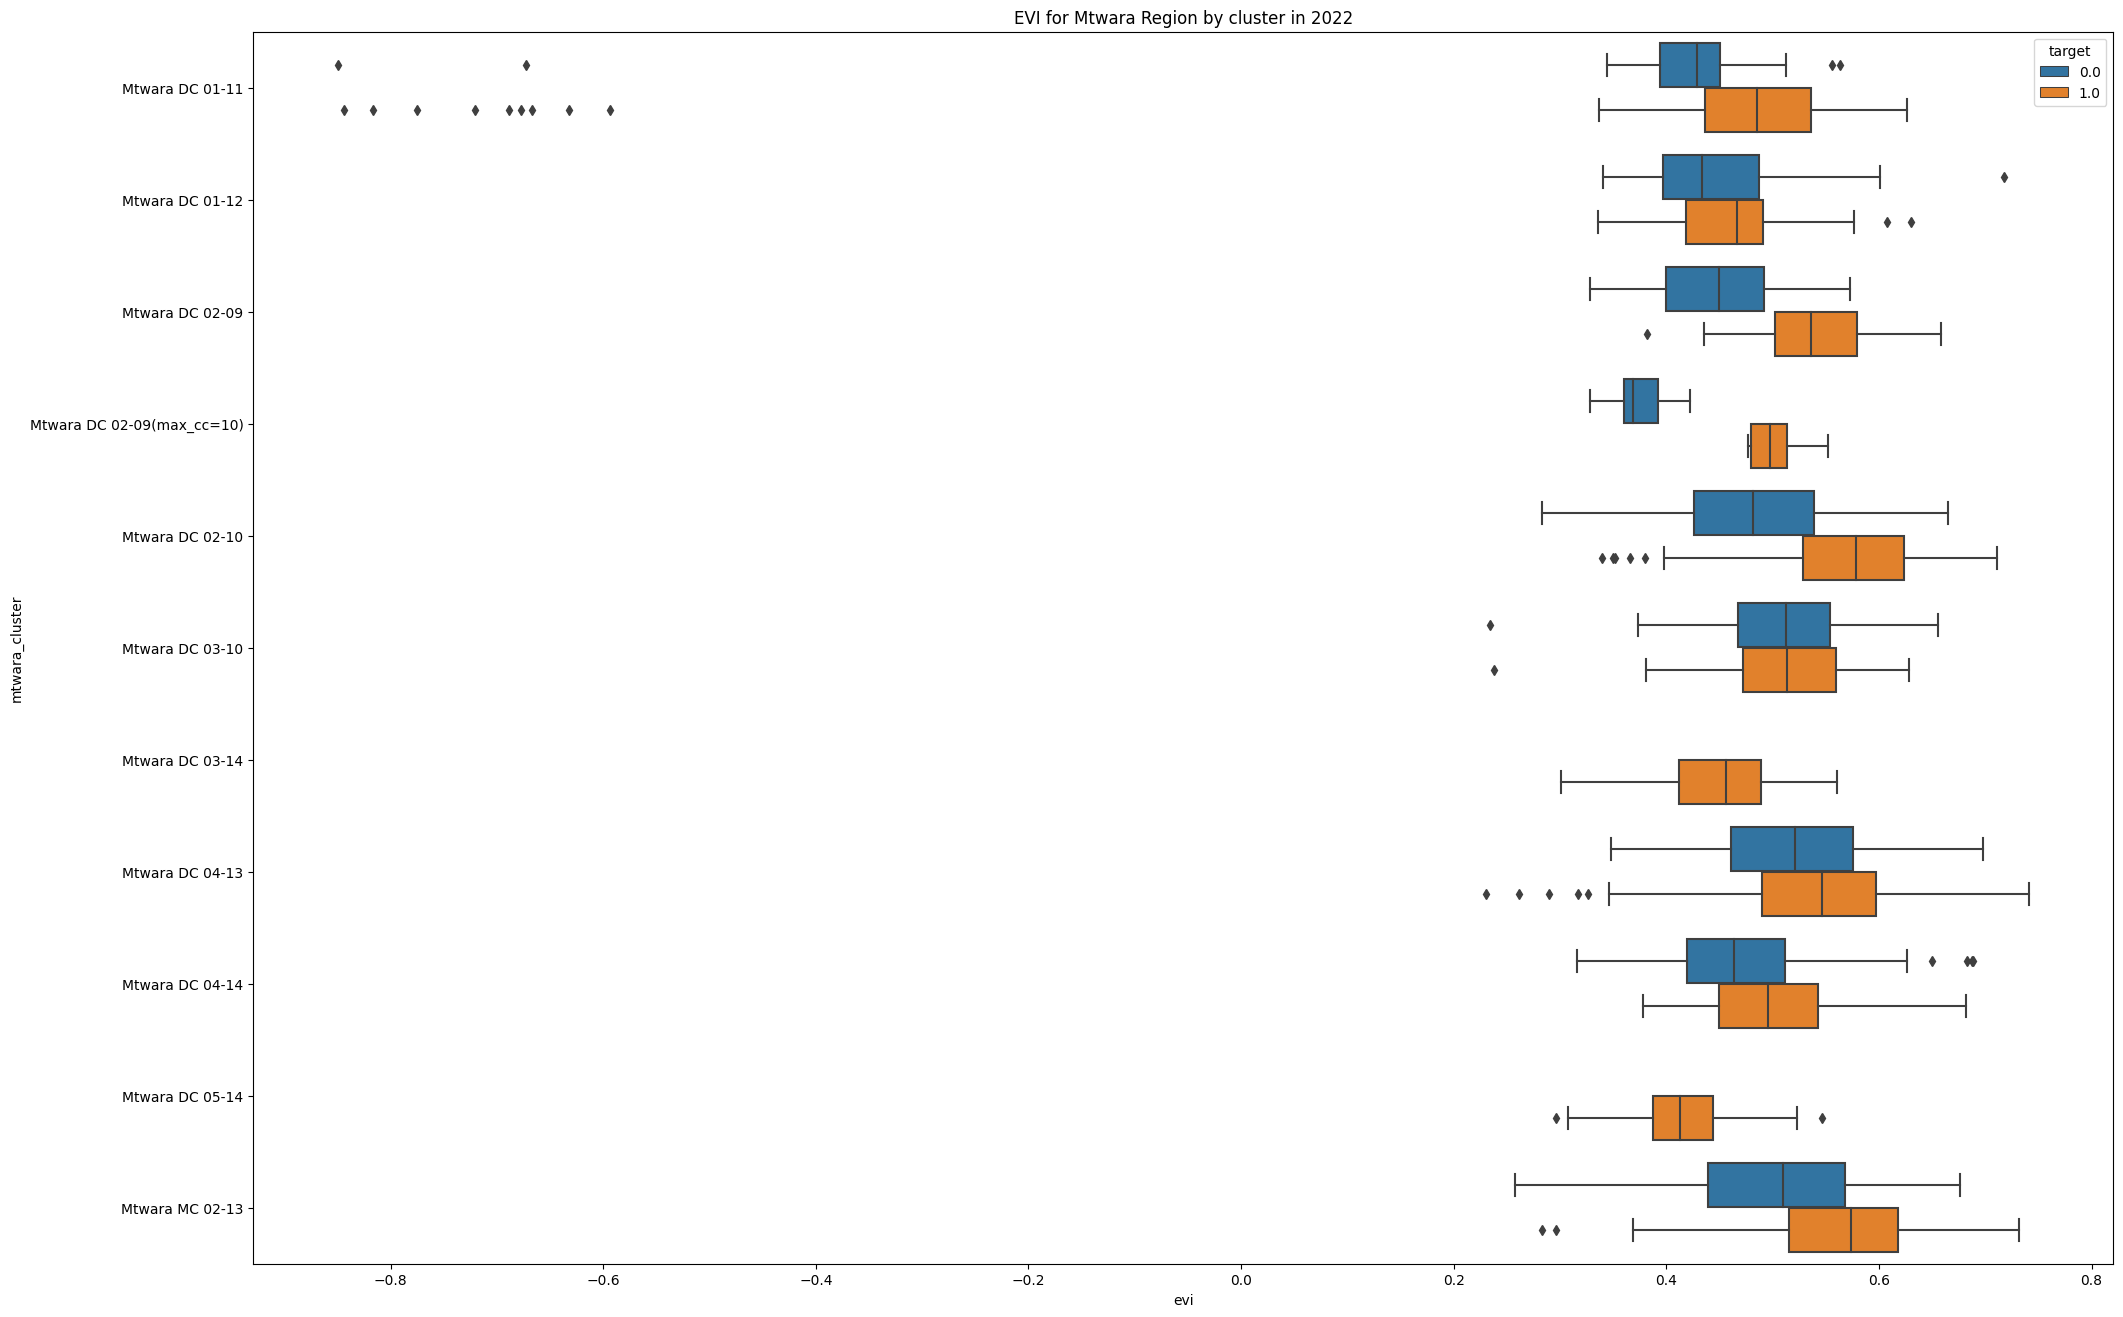

In [ ]:
# by month
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="evi", y="mtwara_cluster", hue="target").set(title='EVI for Mtwara Region by cluster in 2022')

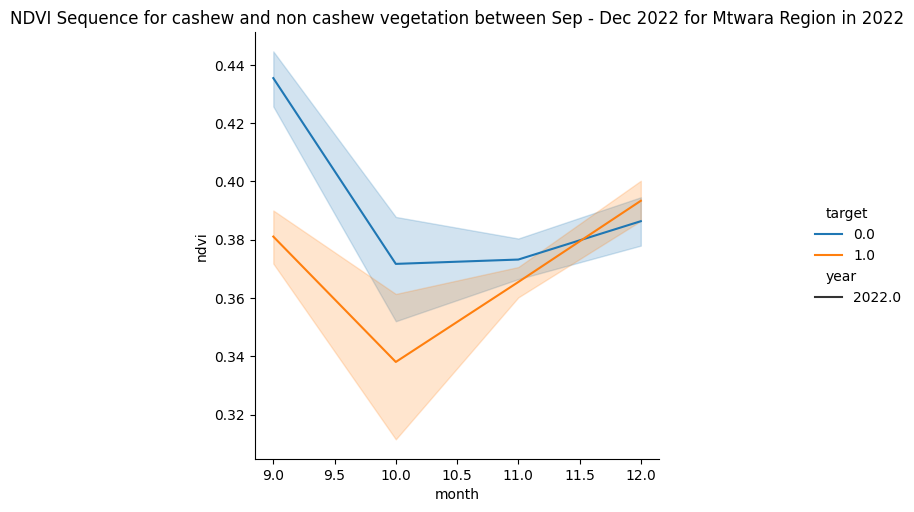

In [ ]:
sns.relplot(data=trees_df, x="month", y="ndvi", hue="target", kind="line", style= 'year').set(title='NDVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Mtwara Region in 2022')

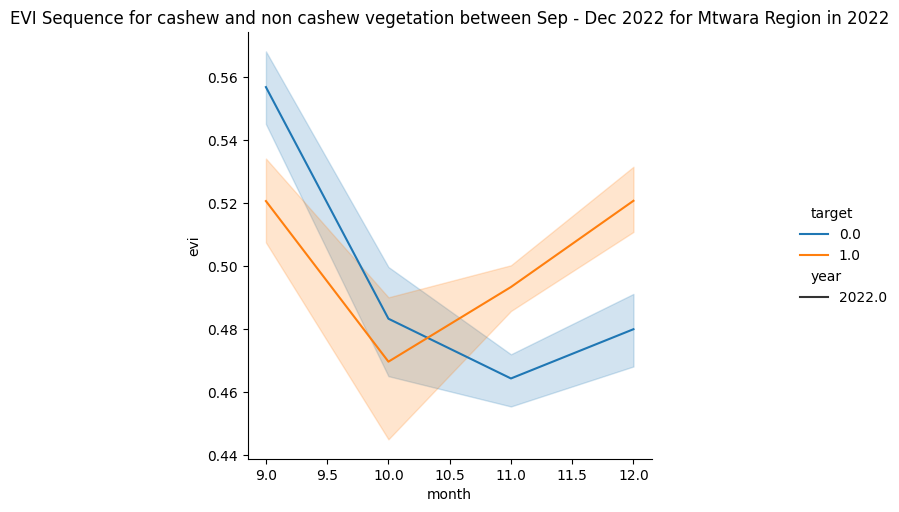

In [ ]:
sns.relplot(data=trees_df, x="month", y="evi", hue="target", kind="line", style= 'year').set(title='EVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Mtwara Region in 2022')

<Figure size 1800x1000 with 0 Axes>

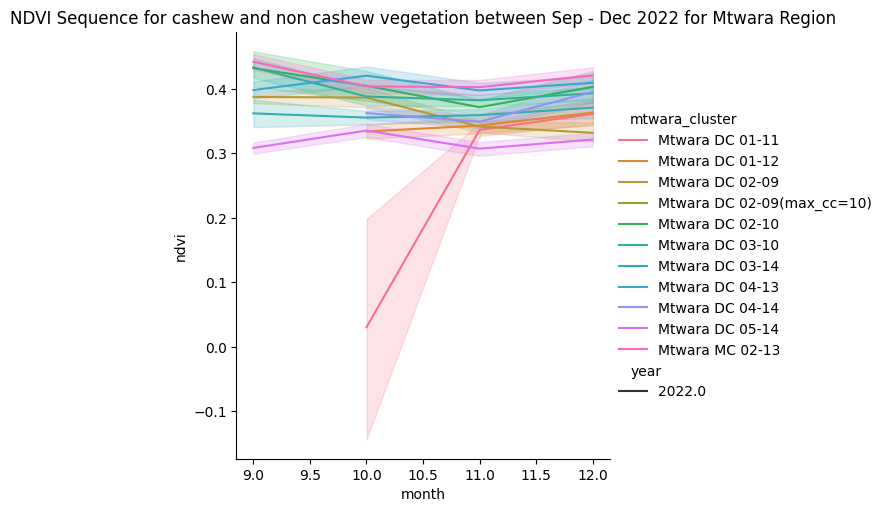

In [ ]:
plt.figure(figsize=(18, 10))
sns.relplot(data=trees_df, x="month", y="ndvi", hue="mtwara_cluster", kind="line", style= 'year').set(title='NDVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Mtwara Region')